# ANOMALY DETECTION

https://scikit-learn.org/stable/modules/outlier_detection.html

La detección de outliers (anomalías) y la detección de novedades son dos conceptos relacionados pero distintos en el campo de la detección de anomalías. Ambos son válidos para identificar patrones inusuales en los datos, pero se aplican en diferentes contextos y con diferentes supuestos.
## Outlier Detection

- Definición: La detección de outliers implica identificar observaciones que son significativamente diferentes o anómalas en comparación con la mayoría de los datos. Estos outliers pueden ser debidos a variaciones en la medición, errores experimentales, o simplemente representar variabilidad natural en los datos.

- Supuestos: Se supone que el conjunto de datos utilizado para entrenar el modelo ya contiene outliers. El modelo aprende a identificar estos outliers en base a los patrones presentes en el conjunto de datos completo.

- Uso: Es común en situaciones donde los datos ya tienen algunos ejemplos de comportamiento anómalo, y el objetivo es identificar más de estos casos.

## Novelty Detection

- Definición: La detección de novedades, por otro lado, se enfoca en identificar nuevas observaciones que difieren significativamente de los datos en los que el modelo fue entrenado. Estas observaciones novedosas pueden no estar presentes en el conjunto de datos de entrenamiento.

- Supuestos: Se asume que el conjunto de datos de entrenamiento está libre de outliers y representa solo el comportamiento "normal". El modelo aprende este comportamiento normal y luego identifica cualquier desviación significativa como novedosa.

- Uso: Es particularmente útil en aplicaciones donde es crucial detectar cambios o eventos nuevos que no se han observado antes.

## Aplicación en Detección de Anomalías

Ambos enfoques son válidos para la detección de anomalías, pero su elección depende del contexto específico:

- Outlier Detection: Útil cuando puedes asumir que tu conjunto de datos incluye tanto datos normales como anómalos, y el objetivo es identificar los anómalos.

- Novelty Detection: Apropiado cuando tienes un conjunto de datos limpio de comportamiento normal y deseas identificar cualquier cosa que se desvíe de este patrón normal.


In [1]:
import numpy as np 
np.random.seed(42)
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os

# Lectura de datos

The dataset refers to the operating parameters of an HVAC system that controls the environmental comfort of a non-residential building located in Turin (Italy).

The dataset contains 11 variables:

    timestamp;
    temperatures of return, supply, and outdoor air [°C];
    relative humidities of return, supply and outdoor air [% and outdoor air [%];
    the temperature setpoint of the return air [°C];
    the saturation temperature in the humidifier [°C];
    power required by the fans [kW];
    energy required by the fans [kWh].

The data refer to the winters 2019-2020 and 2020-2021.

The Source of this dataset is Borda, Davide (2022), “Development of Anomaly Detectors for HVAC Systems using Machine Learning”, Mendeley Data, V1, doi: 10.17632/mjhr46dkj6.1
Please click here for the web link

In [2]:
path = "../data/Anomaly_detection/raw_data/"
data = "HVAC_NE_EC_19-21.csv"


df = pd.read_csv(os.path.join(path, data))

df.head()

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0  2019-10-15 00:00:00+02:00  19.859999  20.469999       18.5         19.02   
1  2019-10-15 00:15:00+02:00  19.855000  20.430000       18.5         19.02   
2  2019-10-15 00:30:00+02:00  19.850000  20.410000       18.5         19.02   
3  2019-10-15 00:45:00+02:00  19.840000  20.379999       18.5         19.08   
4  2019-10-15 01:00:00+02:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power  
0  20.299999  71.110001  58.919998        79.5     0.0    0.0  
1  20.299999  71.320000  59.000000        82.0     0.0    0.0  
2  20.299999  71.470001  59.109997        79.5     0.0    0.0  
3  20.299999  71.439995  59.309998        77.0     0.0    0.0  
4  20.299999  71.580002  59.559998        79.5     0.0    0.0

## inspección de datos

In [3]:
df.tail()

Timestamp   T_Supply   T_Return  SP_Return  \
33883  2021-04-14 22:45:00+02:00  19.539999  20.004999       20.5   
33884  2021-04-14 23:00:00+02:00  19.520000  19.949999       20.5   
33885  2021-04-14 23:15:00+02:00  19.430000  19.955000       20.5   
33886  2021-04-14 23:30:00+02:00  19.420000  19.920000       20.5   
33887  2021-04-14 23:45:00+02:00  19.420000  19.900000       20.5   

       T_Saturation  T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  \
33883     19.619999       14.7  39.020000  27.930000        57.0     0.0   
33884     19.539999       13.7  39.020000  28.090000        57.0     0.0   
33885     19.420000       13.7  39.399998  27.930000        57.0     0.0   
33886     19.400000       13.7  39.599998  28.039999        57.0     0.0   
33887     19.400000       13.7  39.599998  28.150000        57.0     0.0   

       Power  
33883    0.0  
33884    0.0  
33885    0.0  
33886    0.0  
33887    0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


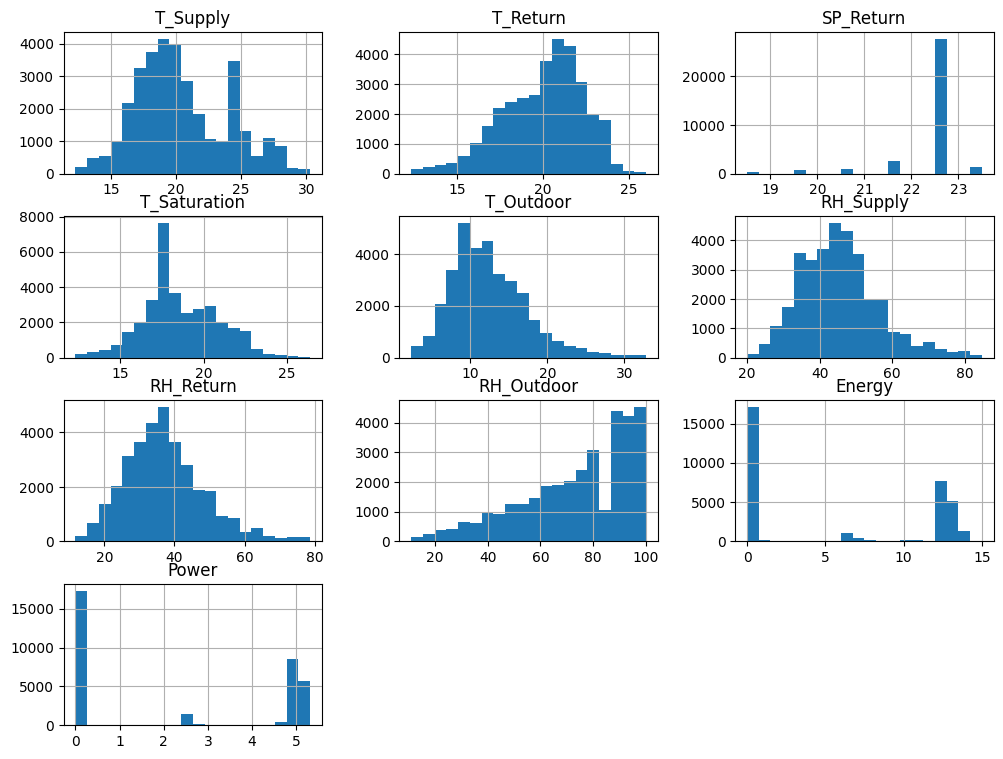

In [5]:
#plt.title('Feature distribution')
df.hist(figsize= (12, 9), bins= 20)
plt.show()

In [6]:
df.columns

Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')

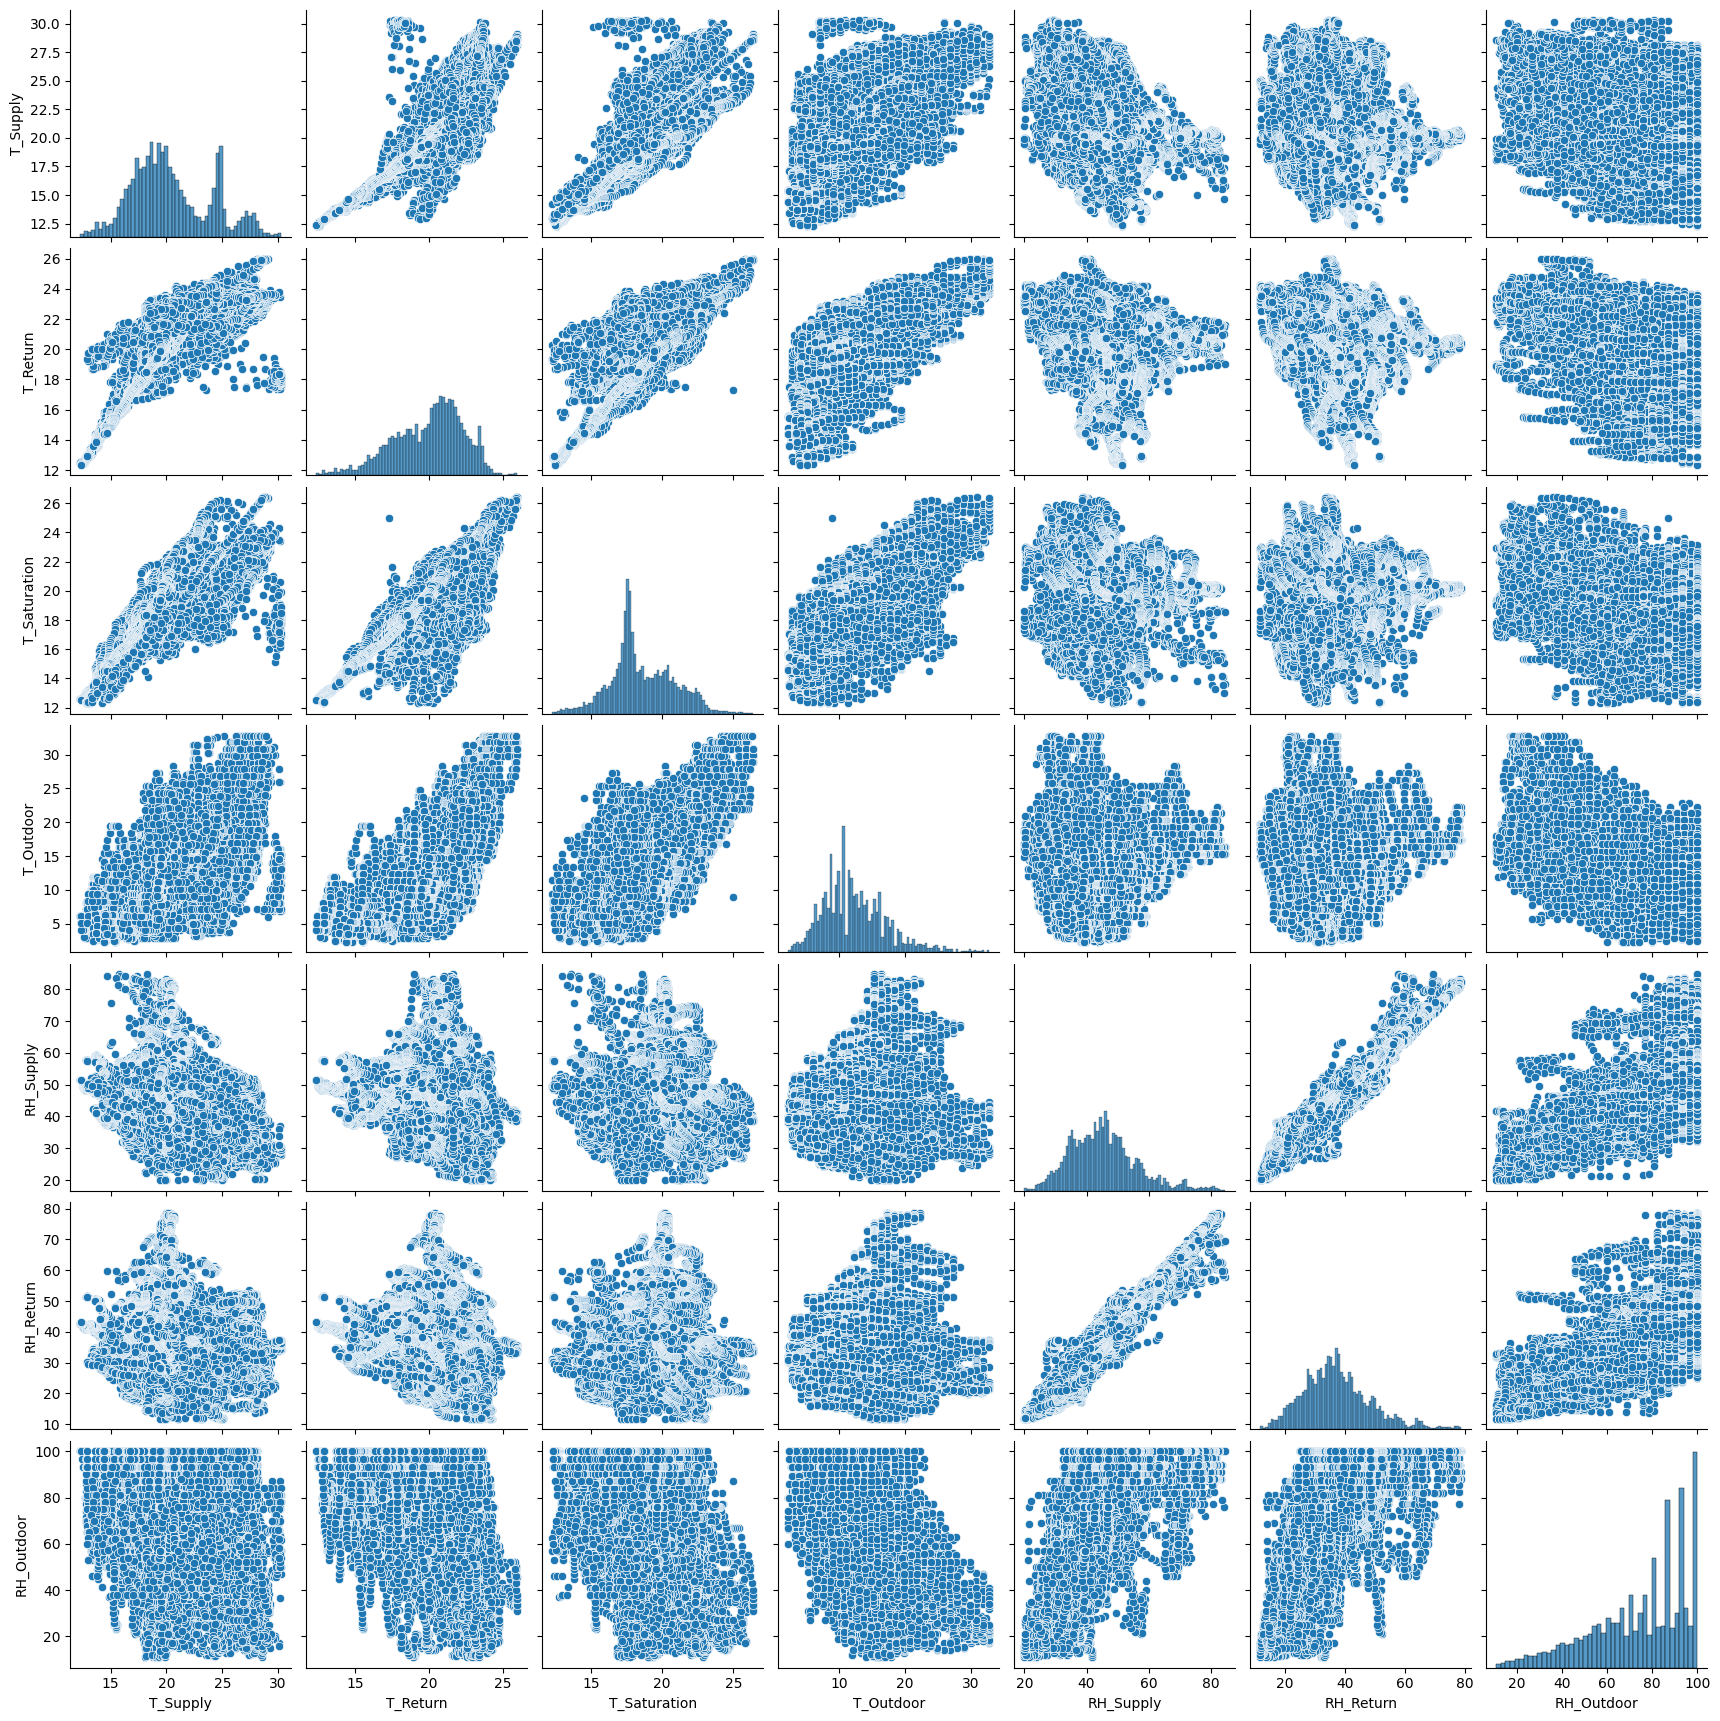

In [7]:
df_num = df[['T_Supply', 'T_Return', 'T_Saturation',
             'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
sns.pairplot(df_num)
plt.show()

In [8]:
df.sample(10)

Timestamp   T_Supply   T_Return  SP_Return  \
32313  2021-03-27 14:15:00+01:00  24.699999  23.355000       21.5   
21499  2020-12-01 22:45:00+01:00  17.209999  17.779999       22.5   
5780   2019-12-14 05:00:00+01:00  16.299999  16.424999       22.5   
26901  2021-01-30 05:15:00+01:00  17.045000  17.395000       22.5   
12827  2020-02-25 14:45:00+01:00  28.039999  23.164999       22.5   
33510  2021-04-11 01:30:00+02:00  19.799999  20.285000       20.5   
33442  2021-04-10 08:30:00+02:00  18.719999  21.889999       21.5   
1959   2019-11-04 09:45:00+01:00  20.170000  19.990000       22.5   
33318  2021-04-09 01:30:00+02:00  20.090000  20.619999       21.5   
10226  2020-01-29 12:30:00+01:00  24.779999  21.549999       22.5   

       T_Saturation  T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  \
32313     22.600000  27.799999  45.340000  37.899998        55.0    13.0   
21499     18.000000   6.300000  49.049999  39.469997       100.0     0.0   
5780      16.400000   8.600000  46.680000  37.939999        78.0     0.0   
26901     17.139999   8.800000  42.639999  33.309998        70.0     0.0   
12827     22.639999  17.000000  40.259998  38.389999        82.0     7.0   
33510     20.020000  10.800000  44.259998  33.160000        93.0     0.0   
33442     16.600000  12.800000  45.320000  29.010000        73.5    12.0   
1959      19.119999  12.300000  58.969997  51.750000       100.0     6.0   
33318     20.699999  12.900000  31.469999  19.010000        47.5     0.0   
10226     17.500000  15.000000  36.320000  30.969999        52.5    13.0   

       Power  
32313  5.184  
21499  0.000  
5780   0.000  
26901  0.000  
12827  2.664  
33510  0.000  
33442  4.980  
1959   2.520  
33318  0.000  
10226  5.124

# Limpieza de datos

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str[0:-6])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     33888 non-null  datetime64[ns]
 1   T_Supply      33888 non-null  float64       
 2   T_Return      33888 non-null  float64       
 3   SP_Return     33888 non-null  float64       
 4   T_Saturation  33888 non-null  float64       
 5   T_Outdoor     33888 non-null  float64       
 6   RH_Supply     33888 non-null  float64       
 7   RH_Return     33888 non-null  float64       
 8   RH_Outdoor    33888 non-null  float64       
 9   Energy        33888 non-null  float64       
 10  Power         33888 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.8 MB
None


Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.859999  20.469999       18.5         19.02   
1 2019-10-15 00:15:00  19.855000  20.430000       18.5         19.02   
2 2019-10-15 00:30:00  19.850000  20.410000       18.5         19.02   
3 2019-10-15 00:45:00  19.840000  20.379999       18.5         19.08   
4 2019-10-15 01:00:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power  
0  20.299999  71.110001  58.919998        79.5     0.0    0.0  
1  20.299999  71.320000  59.000000        82.0     0.0    0.0  
2  20.299999  71.470001  59.109997        79.5     0.0    0.0  
3  20.299999  71.439995  59.309998        77.0     0.0    0.0  
4  20.299999  71.580002  59.559998        79.5     0.0    0.0

## Feature Engineering

In [10]:

def saturation_vapor_pressure(T):
    # La ecuación de Antoine para calcular la presión de vapor de saturación
    # T debe estar en grados Celsius
    A = 8.07131
    B = 1730.63
    C = 233.426
    return 10 ** (A - (B / (C + T)))*0.133322  # este numero es para pasar de hmmg a kpa


def specific_humidity(RH, T, P_atm=101.325):
    P_sat = saturation_vapor_pressure(T)                # Calcular la presión de vapor de saturación en kPa
    RH = RH/100                                         # pasar la humedad relativa de porcentaje a fracción
    return 0.622 * (RH * P_sat) / (P_atm - RH * P_sat)  # Calcular la humedad específica


def calculate_enthalpy(T, RH, P=101.325):
    c_p = 1.005                           # Calor específico del aire a presión constante en kJ/kg°C
    h_vap = 2501                          # Entalpía de vaporización del agua en kJ/kg
    w = specific_humidity(RH, T, P)       # Calcular la humedad específica
    h = c_p * (T) + w * h_vap               # Calcular la entalpía en kJ/kg
    return h


def delta_h(df):
    h_out = calculate_enthalpy(T= df['T_Outdoor'], RH= df['RH_Outdoor'])   # entalpia out
    h_sup = calculate_enthalpy(T= df['T_Supply'], RH= df['RH_Supply'])   # entalpia supply
    return h_sup-h_out


def calculate_wet_bulb_temperature(df):
    RH = df['RH_Outdoor'] / 100  # Convertir la humedad relativa a una fracción
    Twb = (df['T_Outdoor'] * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) +
           np.arctan(df['T_Outdoor'] + RH) - np.arctan(RH - 1.676331) +
           0.00391838 * RH**1.5 * np.arctan(0.023101 * RH) - 4.686035)
    return Twb


def calculate_KPI(df):

    from sklearn.linear_model import HuberRegressor
    
    Delta_h = delta_h(df)                                    # Calcular la diferencia de entalpía como un vector
    T_wb_out = calculate_wet_bulb_temperature(df)            # Calcular la temperatura de bulbo húmedo como un vector
    huber = HuberRegressor()                                 # Crear el regresor de Huber y ajustarlo con los vectores creados
    huber.fit(T_wb_out.values.reshape(-1, 1), Delta_h)
    D_hat_h = huber.predict(T_wb_out.values.reshape(-1, 1))  # Predecir la entalpía ajustada a la línea de mejor ajuste con el regresor de Huber
    KPI = Delta_h / D_hat_h                                  # Calcular el KPI como un vector y no como una columna en el DataFrame
    
    return KPI                       # Devolver el vector KPI

df['delta_h'] = delta_h(df)
df['KPI'] = calculate_KPI(df)
t_wb_out = calculate_wet_bulb_temperature(df)
df['T_wb_out'] = calculate_wet_bulb_temperature(df)

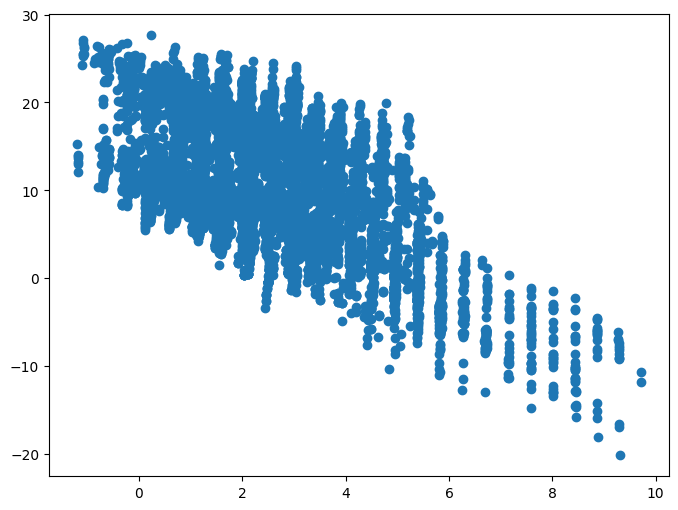

In [11]:
plt.figure(figsize= (8, 6))

plt.scatter(x= t_wb_out[:10000], y= df['delta_h'][:10000].values)
plt.show()

In [12]:
display(df.head())
display(df.tail())

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.859999  20.469999       18.5         19.02   
1 2019-10-15 00:15:00  19.855000  20.430000       18.5         19.02   
2 2019-10-15 00:30:00  19.850000  20.410000       18.5         19.02   
3 2019-10-15 00:45:00  19.840000  20.379999       18.5         19.08   
4 2019-10-15 01:00:00  19.830000  20.350000       18.5         19.08   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
0  20.299999  71.110001  58.919998        79.5     0.0    0.0 -4.330843   
1  20.299999  71.320000  59.000000        82.0     0.0    0.0 -5.213420   
2  20.299999  71.470001  59.109997        79.5     0.0    0.0 -4.225259   
3  20.299999  71.439995  59.309998        77.0     0.0    0.0 -3.317295   
4  20.299999  71.580002  59.559998        79.5     0.0    0.0 -4.237626   

        KPI  T_wb_out  
0 -1.845855  6.289753  
1 -2.216344  6.286114  
2 -1.800854  6.289753  
3 -1.417131  6.293024  
4 -1.806125  6.289753

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
33883 2021-04-14 22:45:00  19.539999  20.004999       20.5     19.619999   
33884 2021-04-14 23:00:00  19.520000  19.949999       20.5     19.539999   
33885 2021-04-14 23:15:00  19.430000  19.955000       20.5     19.420000   
33886 2021-04-14 23:30:00  19.420000  19.920000       20.5     19.400000   
33887 2021-04-14 23:45:00  19.420000  19.900000       20.5     19.400000   

       T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
33883       14.7  39.020000  27.930000        57.0     0.0    0.0  3.837602   
33884       13.7  39.020000  28.090000        57.0     0.0    0.0  5.738965   
33885       13.7  39.399998  27.930000        57.0     0.0    0.0  5.704928   
33886       13.7  39.599998  28.039999        57.0     0.0    0.0  5.756475   
33887       13.7  39.599998  28.150000        57.0     0.0    0.0  5.756475   

            KPI  T_wb_out  
33883  0.611142  3.907501  
33884  0.821125  3.477608  
33885  0.816255  3.477608  
33886  0.823630  3.477608  
33887  0.823630  3.477608

In [13]:
df.sample(5)

Timestamp   T_Supply  T_Return  SP_Return  T_Saturation  \
16817 2020-04-14 04:15:00  22.160000    22.205       22.5     22.260000   
8981  2020-01-16 13:15:00  24.855000    21.705       22.5     17.959999   
28831 2021-02-19 07:45:00  18.445000    19.475       22.5     16.600000   
29919 2021-03-02 15:45:00  22.355000    22.260       19.5     20.400000   
20641 2020-11-23 00:15:00  16.809999    16.785       22.5     16.459999   

       T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power    delta_h  \
16817  17.799999  39.239998  30.279999        67.0     0.0  0.000  -0.586755   
8981   11.400000  33.599998  27.299999        57.0    12.0  5.004  18.018029   
28831  11.100000  49.680000  38.559998        87.0    14.0  4.956   5.918465   
29919  21.299999  29.179998  20.500000        22.0    13.0  5.232   4.643808   
20641   8.900000  43.450001  31.900000        81.0     0.0  0.000   6.545355   

            KPI  T_wb_out  
16817 -0.143112  5.227554  
8981   2.088719  2.485975  
28831  0.658957  2.270831  
29919  2.801913  6.707000  
20641  0.620939  1.326261

In [14]:
df.describe()

Timestamp      T_Supply      T_Return  \
count                          33888  33888.000000  33888.000000   
mean   2020-07-14 07:06:56.855524096     20.436936     19.994425   
min              2019-10-15 00:00:00     12.264999     12.344999   
25%              2020-01-11 05:56:15     17.879999     18.389999   
50%              2020-10-15 11:52:30     19.785000     20.385000   
75%              2021-01-14 17:48:45     23.256249     21.699999   
max              2021-04-14 23:45:00     30.295000     25.990000   
std                              NaN      3.535683      2.357756   

          SP_Return  T_Saturation     T_Outdoor     RH_Supply     RH_Return  \
count  33888.000000  33888.000000  33888.000000  33888.000000  33888.000000   
mean      22.302290     18.580051     12.414164     45.433972     37.251636   
min       18.500000     12.300000      2.300000     19.939999     11.730000   
25%       22.500000     17.260000      8.900000     37.709999     29.420000   
50%       22.500000     18.059999     11.800000     44.669998     36.230000   
75%       22.500000     20.180000     15.300000     51.180000     43.329998   
max       23.500000     26.400000     32.799999     84.699997     78.699997   
std        0.745301      2.237516      4.925918     10.765867     11.253552   

         RH_Outdoor        Energy         Power       delta_h           KPI  \
count  33888.000000  33888.000000  33888.000000  33888.000000  33888.000000   
mean      73.803308      5.769196      2.308225      8.556169      1.109249   
min       11.000000      0.000000      0.000000    -30.258044   -460.383018   
25%       60.000000      0.000000      0.000000      4.628432      0.623785   
50%       78.500000      0.000000      0.000000      8.623630      0.972413   
75%       93.000000     12.000000      4.980000     12.470193      1.547195   
max      100.000000     15.000000      5.316000     31.468454   2491.813094   
std       21.116373      6.074394      2.432835      6.548068     16.263161   

           T_wb_out  
count  33888.000000  
mean       2.853741  
min       -1.764271  
25%        1.312206  
50%        2.555091  
75%        4.093220  
max       11.596007  
std        2.151066

# Feature extraction

In [15]:
df.set_index('Timestamp', inplace= True)

df_half_hourly = df.resample('30T').mean()
df_hourly = df.resample('H').mean()
print(df_hourly.info())
print(df_half_hourly.info())
df_hourly.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13152 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Freq: H
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Freq: 30T
Data columns (total 13 columns):
 # 

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-01-25 17:00:00  18.298749  18.278749       22.5     18.514999      13.40   
2020-01-26 16:00:00  16.317500  16.325000       22.5     16.160000      14.65   
2020-05-08 08:00:00        NaN        NaN        NaN           NaN        NaN   
2020-06-03 08:00:00        NaN        NaN        NaN           NaN        NaN   
2020-07-14 01:00:00        NaN        NaN        NaN           NaN        NaN   
2020-06-17 18:00:00        NaN        NaN        NaN           NaN        NaN   
2019-11-29 10:00:00  26.688750  21.837500       22.5     21.120000       9.85   
2021-01-12 12:00:00  16.317500  19.841249       22.5     14.630000       8.05   
2019-11-01 20:00:00  20.643750  20.680000       22.5     20.744999      14.80   
2020-08-04 18:00:00        NaN        NaN        NaN           NaN        NaN   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-01-25 17:00:00  40.349999  30.649999      59.500    0.00  0.000   
2020-01-26 16:00:00  43.697499  35.587500      64.000    0.00  0.000   
2020-05-08 08:00:00        NaN        NaN         NaN     NaN    NaN   
2020-06-03 08:00:00        NaN        NaN         NaN     NaN    NaN   
2020-07-14 01:00:00        NaN        NaN         NaN     NaN    NaN   
2020-06-17 18:00:00        NaN        NaN         NaN     NaN    NaN   
2019-11-29 10:00:00  41.552499  39.552500      85.875    6.00  2.472   
2021-01-12 12:00:00  36.167499  23.259999      63.125   12.25  4.902   
2019-11-01 20:00:00  61.079999  53.744999      94.000    1.50  0.000   
2020-08-04 18:00:00        NaN        NaN         NaN     NaN    NaN   

                       delta_h       KPI  T_wb_out  
Timestamp                                           
2020-01-25 17:00:00   3.947371  0.532127  3.342249  
2020-01-26 16:00:00  -2.314365 -0.388530  3.874913  
2020-05-08 08:00:00        NaN       NaN       NaN  
2020-06-03 08:00:00        NaN       NaN       NaN  
2020-07-14 01:00:00        NaN       NaN       NaN  
2020-06-17 18:00:00        NaN       NaN       NaN  
2019-11-29 10:00:00  23.418743  2.372642  1.724765  
2021-01-12 12:00:00   8.201775  0.741616  1.011301  
2019-11-01 20:00:00   4.355053  0.687107  3.865087  
2020-08-04 18:00:00        NaN       NaN       NaN

In [16]:
df_half_hourly.dropna(axis= 0, inplace= True)
df_half_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16944 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      16944 non-null  float64
 1   T_Return      16944 non-null  float64
 2   SP_Return     16944 non-null  float64
 3   T_Saturation  16944 non-null  float64
 4   T_Outdoor     16944 non-null  float64
 5   RH_Supply     16944 non-null  float64
 6   RH_Return     16944 non-null  float64
 7   RH_Outdoor    16944 non-null  float64
 8   Energy        16944 non-null  float64
 9   Power         16944 non-null  float64
 10  delta_h       16944 non-null  float64
 11  KPI           16944 non-null  float64
 12  T_wb_out      16944 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [17]:
df_hourly.dropna(axis= 0, inplace= True)
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8472 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 926.6 KB


In [18]:
df_half_hourly.reset_index(inplace= True)
df_hourly.reset_index(inplace=True)
df_half_hourly.head()

Timestamp   T_Supply   T_Return  SP_Return  T_Saturation  \
0 2019-10-15 00:00:00  19.857499  20.450000       18.5     19.020000   
1 2019-10-15 00:30:00  19.845000  20.395000       18.5     19.050000   
2 2019-10-15 01:00:00  19.830000  20.335000       18.5     19.090000   
3 2019-10-15 01:30:00  19.829999  20.304999       18.5     19.129999   
4 2019-10-15 02:00:00  19.814999  20.265000       18.5     19.160000   

   T_Outdoor  RH_Supply  RH_Return  RH_Outdoor  Energy  Power   delta_h  \
0  20.299999  71.215001  58.959999       80.75     0.0    0.0 -4.772131   
1  20.299999  71.454998  59.209998       78.25     0.0    0.0 -3.771277   
2  20.299999  71.590000  59.609999       80.75     0.0    0.0 -4.707157   
3  19.299999  71.684998  59.829998       86.50     0.0    0.0 -3.871179   
4  19.299999  71.765000  60.055000       83.50     0.0    0.0 -2.814665   

        KPI  T_wb_out  
0 -2.031100  6.287933  
1 -1.608993  6.291388  
2 -2.003427  6.287933  
3 -1.256177  5.844707  
4 -0.916121  5.850462

In [19]:
# Extraer mes, día del mes y hora del día
df_hourly['month'] = df_hourly['Timestamp'].dt.month
df_hourly['day'] = df_hourly['Timestamp'].dt.day
df_hourly['hour'] = df_hourly['Timestamp'].dt.hour

df_hourly.set_index('Timestamp', inplace=True)
df_hourly.sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-03-28 15:00:00  24.947500  22.082500       22.5     22.360000  25.100000   
2021-04-13 10:00:00  21.985000  21.657500       21.5     18.040000  15.850000   
2020-03-03 08:00:00  24.441250  20.663749       22.5     17.820000  10.150000   
2019-11-20 16:00:00  24.282500  22.396249       22.5     17.095000  16.150000   
2019-12-13 12:00:00  24.748749  21.305000       22.5     17.340000   5.550000   
2019-12-29 10:00:00  15.744999  15.926250       22.5     15.915000   9.100000   
2020-01-06 00:00:00  15.508750  15.776249       22.5     15.794999   7.900000   
2020-04-10 14:00:00  25.834999  23.479999       23.5     23.630000  31.549999   
2021-02-13 19:00:00  16.171249  16.354999       22.5     16.160000   3.850000   
2020-02-26 02:00:00  19.431249  19.593750       22.5     20.229999  10.900000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-03-28 15:00:00  37.995000  32.632498      41.625    4.00  1.296   
2021-04-13 10:00:00  39.812499  30.694999      39.500   12.25  4.932   
2020-03-03 08:00:00  24.810000  21.232499      42.250   12.75  5.178   
2019-11-20 16:00:00  49.815000  45.412498      88.000   12.00  4.836   
2019-12-13 12:00:00  35.344999  29.302499      87.750   12.50  4.956   
2019-12-29 10:00:00  47.117500  38.364998      82.500    0.00  0.000   
2020-01-06 00:00:00  47.554998  38.975000      66.875    0.00  0.000   
2020-04-10 14:00:00  31.762500  24.684999      21.875   13.00  5.187   
2021-02-13 19:00:00  40.667499  33.362499      62.500    0.00  0.000   
2020-02-26 02:00:00  52.407498  44.402499      89.250    0.00  0.000   

                       delta_h       KPI   T_wb_out  month  day  hour  
Timestamp                                                              
2020-03-28 15:00:00  -2.163451  2.097968   8.338919      3   28    15  
2021-04-13 10:00:00  11.470485  2.102084   4.412804      4   13    10  
2020-03-03 08:00:00  18.023219  1.904989   1.972708      3    3     8  
2019-11-20 16:00:00   6.557570  1.215825   4.472324     11   20    16  
2019-12-13 12:00:00  24.109081  1.842235  -0.201537     12   13    12  
2019-12-29 10:00:00   4.978687  0.476468   1.408154     12   29    10  
2020-01-06 00:00:00   9.616220  0.858797   0.933633      1    6     0  
2020-04-10 14:00:00  -5.099146  0.925268  11.004246      4   10    14  
2021-02-13 19:00:00  16.191740  1.140642  -0.884870      2   13    19  
2020-02-26 02:00:00   8.902140  0.973997   2.174358      2   26     2

In [20]:
# Extraer mes, día del mes y hora del día
df_half_hourly['month'] = df_half_hourly['Timestamp'].dt.month
df_half_hourly['day'] = df_half_hourly['Timestamp'].dt.day
df_half_hourly['hour'] = df_half_hourly['Timestamp'].dt.hour

df_half_hourly.set_index('Timestamp', inplace=True)
df_half_hourly.sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-12-28 10:00:00  13.965000  14.007500       22.5     14.139999   3.300000   
2020-03-19 05:00:00  19.905000  19.865000       22.5     20.280000  12.300000   
2020-02-04 09:00:00  27.265000  21.849999       22.5     21.500000  16.400000   
2019-12-23 18:30:00  24.224999  22.169999       22.5     17.079999  12.600000   
2020-01-06 15:30:00  24.837499  20.497499       22.5     17.669999  13.600000   
2021-01-14 04:30:00  14.482499  14.885000       22.5     14.870000   3.600000   
2019-12-12 11:30:00  24.705000  21.164999       22.5     17.520000   8.600000   
2019-11-05 21:30:00  18.829999  19.702500       22.5     20.700000  13.900000   
2020-10-22 22:30:00  20.979999  21.280000       22.5     22.479999  17.299999   
2021-04-09 16:00:00  20.472500  23.137500       21.5     18.249999  20.799999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-12-28 10:00:00  48.814999  40.569997       93.00     0.0  0.000   
2020-03-19 05:00:00  45.990000  37.520000       72.25     0.0  0.000   
2020-02-04 09:00:00  34.595000  32.890000       17.00     6.5  2.586   
2019-12-23 18:30:00  31.864998  25.454999       30.75    12.5  4.998   
2020-01-06 15:30:00  35.775000  31.609999       60.75    12.5  5.004   
2021-01-14 04:30:00  44.809998  35.770000       93.00     0.0  0.000   
2019-12-12 11:30:00  34.874999  28.709999      100.00    12.5  4.926   
2019-11-05 21:30:00  66.684998  56.499998       87.00     0.0  0.000   
2020-10-22 22:30:00  59.484999  50.964998       88.00     0.0  0.000   
2021-04-09 16:00:00  38.529999  26.074999       36.00    12.5  4.998   

                       delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                             
2020-12-28 10:00:00  11.652855  0.783942 -1.280789     12   28    10  
2020-03-19 05:00:00   8.219206  1.022250  2.840841      3   19     5  
2020-02-04 09:00:00  25.472775  5.039273  4.643581      2    4     9  
2019-12-23 18:30:00  19.689734  2.550907  3.035718     12   23    18  
2020-01-06 15:30:00  14.070013  1.989986  3.428327      1    6    15  
2021-01-14 04:30:00  11.026423  0.755160 -1.133060      1   14     4  
2019-12-12 11:30:00  15.735594  1.443993  1.110505     12   12    11  
2019-11-05 21:30:00   6.044220  0.868380  3.495059     11    5    21  
2020-10-22 22:30:00  -0.397895 -0.088014  4.972641     10   22    22  
2021-04-09 16:00:00   0.317064 -0.279195  6.512177      4    9    16

8472
1512
1474


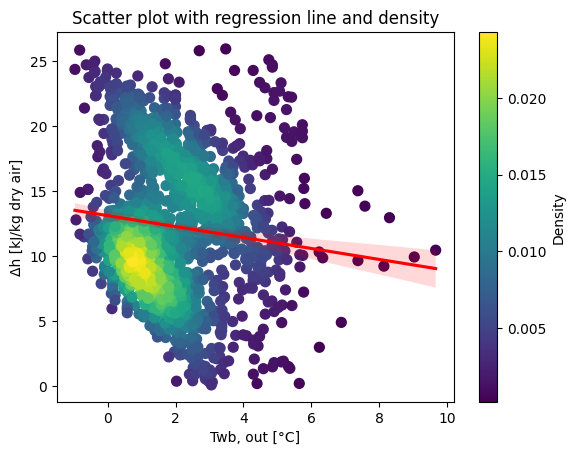

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

start_date = '2019-12-15'
end_date = '2020-02-15'

print(len(df_hourly))
df_h_2019_2020 = df_hourly.loc[start_date:end_date]
print(len(df_h_2019_2020))
df_h_2019_2020 = df_h_2019_2020[df_h_2019_2020['delta_h'] >=0]
#Asumimos que df es tu DataFrame y ya contiene las columnas 'Twb_out' y 'Delta_h'
print(len(df_h_2019_2020))
#Calcula la densidad de los puntos
x = df_h_2019_2020['T_wb_out']
y = df_h_2019_2020['delta_h']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

#Crea el gráfico de dispersión
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=50, cmap='viridis')

#Añade la barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Density')

#Añade la línea de regresión
sns.regplot(x='T_wb_out', y='delta_h', data=df_h_2019_2020, scatter=False, ax=ax, color='red')

#Añade etiquetas y título si es necesario
ax.set_xlabel('Twb, out [°C]')
ax.set_ylabel('Δh [kJ/kg dry air]')
ax.set_title('Scatter plot with regression line and density')

#Muestra el gráfico
plt.show()

In [22]:
# df_hourly.hist(figsize=(15, 10), bins= 20)
# plt.show()

In [23]:
# df_num_h = df_hourly[['T_Supply', 'T_Return', 'T_Saturation',
#                       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
# sns.pairplot(df_num_h)
# plt.show()

# Data Processing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# partición externa (mantenemos el orden por que puede ser interesante para inferencia)

X_train_full, X_test = train_test_split(df_half_hourly, shuffle= False, test_size=0.1)

print('Particion Externa de datos: ')
print(X_train_full.shape)
print(X_test.shape)
print('\n')
# particion interna: aqui si mezclamos los datos

X_train, X_val = train_test_split(X_train_full, random_state=42, shuffle= True, test_size=0.25)

print('Particion Externa de datos: ')
print(X_train.shape)
print(X_val.shape)

Particion Externa de datos: 
(15249, 16)
(1695, 16)


Particion Externa de datos: 
(11436, 16)
(3813, 16)


In [26]:
X_train_full.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-10-15 00:00:00  19.857499  20.450000       18.5     19.020000  20.299999   
2019-10-15 00:30:00  19.845000  20.395000       18.5     19.050000  20.299999   
2019-10-15 01:00:00  19.830000  20.335000       18.5     19.090000  20.299999   
2019-10-15 01:30:00  19.829999  20.304999       18.5     19.129999  19.299999   
2019-10-15 02:00:00  19.814999  20.265000       18.5     19.160000  19.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-10-15 00:00:00  71.215001  58.959999       80.75     0.0    0.0   
2019-10-15 00:30:00  71.454998  59.209998       78.25     0.0    0.0   
2019-10-15 01:00:00  71.590000  59.609999       80.75     0.0    0.0   
2019-10-15 01:30:00  71.684998  59.829998       86.50     0.0    0.0   
2019-10-15 02:00:00  71.765000  60.055000       83.50     0.0    0.0   

                      delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                            
2019-10-15 00:00:00 -4.772131 -2.031100  6.287933     10   15     0  
2019-10-15 00:30:00 -3.771277 -1.608993  6.291388     10   15     0  
2019-10-15 01:00:00 -4.707157 -2.003427  6.287933     10   15     1  
2019-10-15 01:30:00 -3.871179 -1.256177  5.844707     10   15     1  
2019-10-15 02:00:00 -2.814665 -0.916121  5.850462     10   15     2

In [27]:
X_test.tail()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-04-14 21:30:00  19.270000  20.680000       21.5     18.899999       14.7   
2021-04-14 22:00:00  19.479999  20.220000       20.5     19.350000       14.7   
2021-04-14 22:30:00  19.539999  20.032499       20.5     19.570000       14.7   
2021-04-14 23:00:00  19.475000  19.952499       20.5     19.480000       13.7   
2021-04-14 23:30:00  19.420000  19.910000       20.5     19.400000       13.7   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-04-14 21:30:00  39.379999  26.659999       54.00     0.0    0.0   
2021-04-14 22:00:00  39.095000  27.649998       56.25     0.0    0.0   
2021-04-14 22:30:00  39.020000  27.849999       57.00     0.0    0.0   
2021-04-14 23:00:00  39.209999  28.010000       57.00     0.0    0.0   
2021-04-14 23:30:00  39.599998  28.095000       57.00     0.0    0.0   

                      delta_h       KPI  T_wb_out  month  day  hour  
Timestamp                                                            
2021-04-14 21:30:00  4.242619  0.676321  3.911320      4   14    21  
2021-04-14 22:00:00  3.947589  0.628826  3.908482      4   14    22  
2021-04-14 22:30:00  3.837602  0.611142  3.907501      4   14    22  
2021-04-14 23:00:00  5.721947  0.818690  3.477608      4   14    23  
2021-04-14 23:30:00  5.756475  0.823630  3.477608      4   14    23

## Guardamos los datos procesados

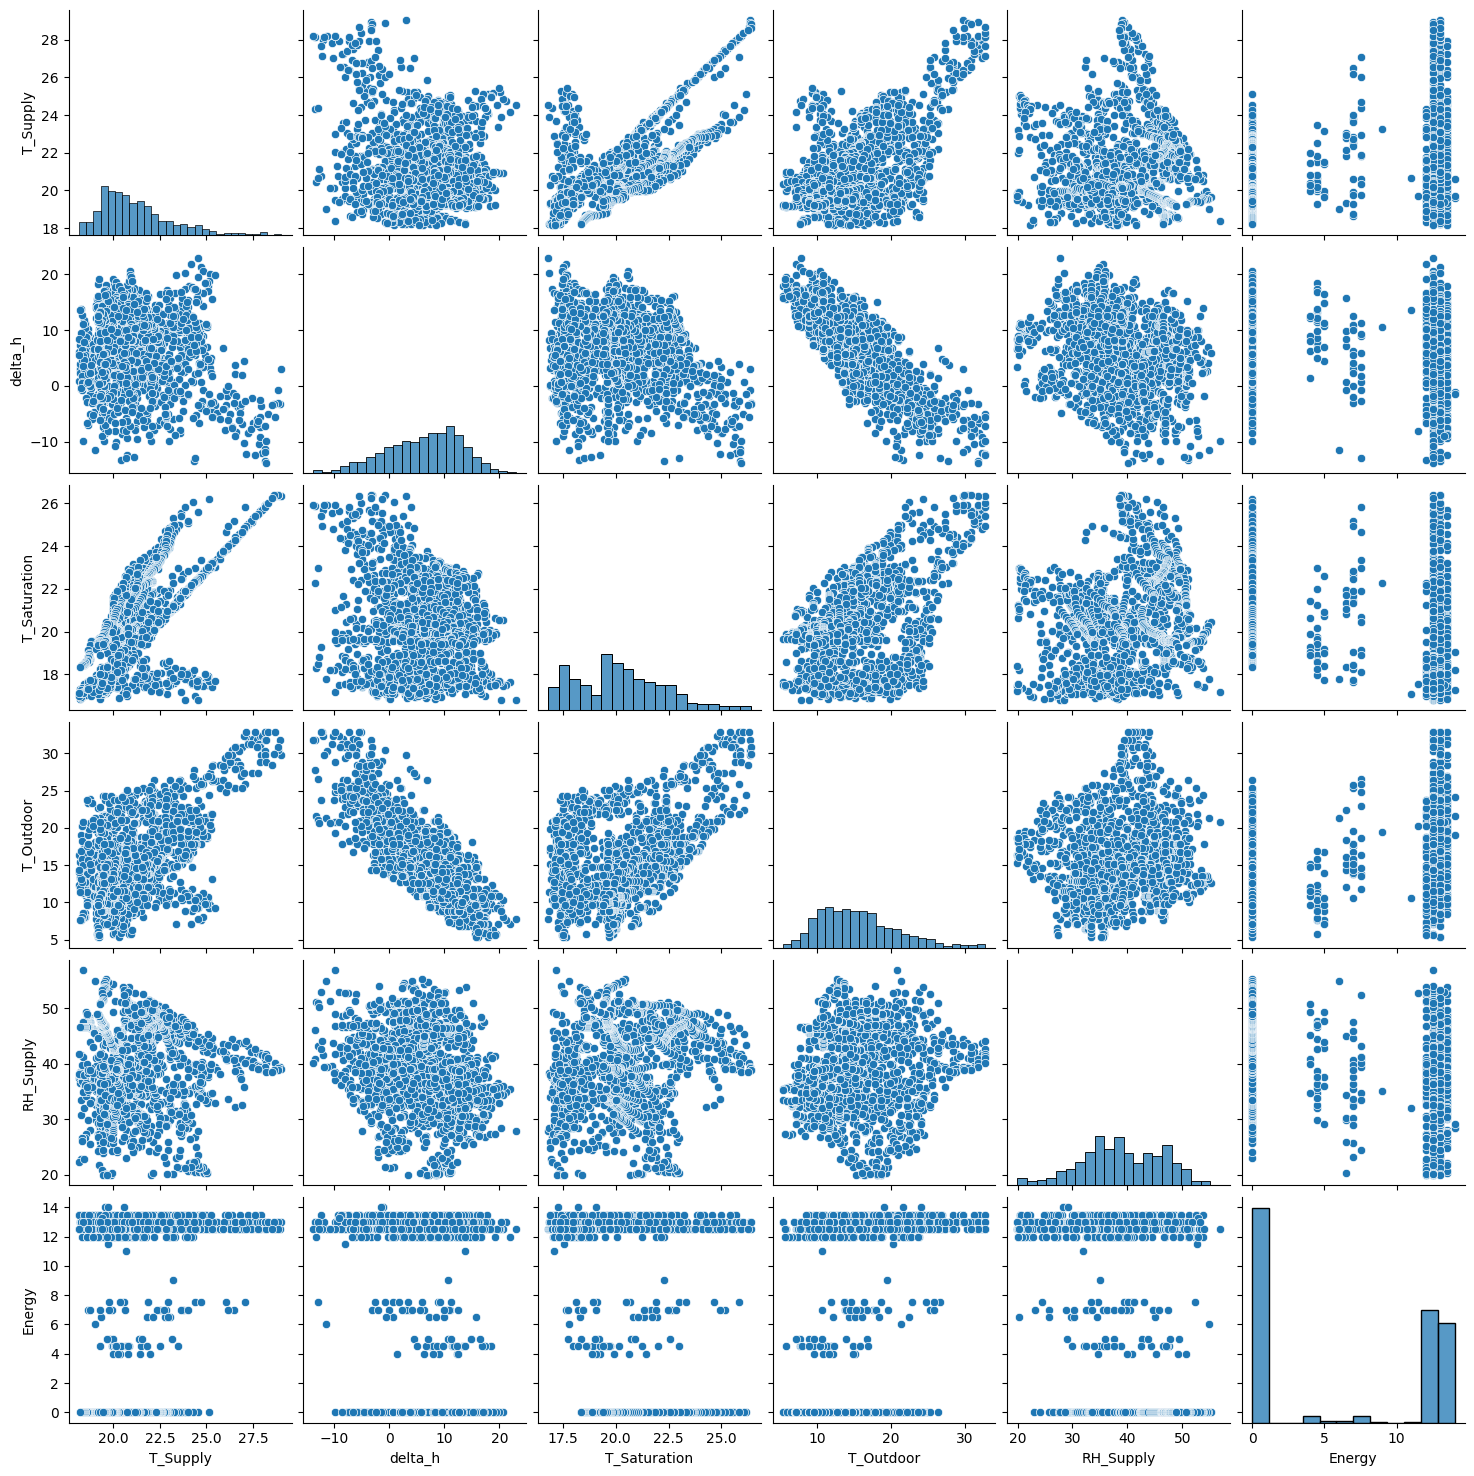

In [28]:
sns.pairplot(X_test[['T_Supply', 'delta_h', 'T_Saturation',
             'T_Outdoor', 'RH_Supply', 'Energy']])
plt.show()

In [29]:
data_path = '../data/Anomaly_detection/processed_data/'

# X_train.to_csv(path + 'HVAC_train_processed.csv')
# X_test.to_csv(path + 'HVAC_test_processed.csv')

from load_store_utils import guardar_datos_procesados

guardar_datos_procesados(data= X_train_full, name= 'HVAC_train_full_processed.csv', ruta_datos= data_path)
guardar_datos_procesados(data= X_test, name= 'HVAC_test_processeded.csv', ruta_datos=data_path)

Los datos HVAC_train_full_processed.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.
Los datos HVAC_test_processeded.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.


False

## Escalado de datos

In [30]:
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)

X_train_scl_df = pd.DataFrame(X_train_scl, columns= scaler.feature_names_in_, index= X_train.index)
X_val_scl_df = pd.DataFrame(X_val_scl, columns= scaler.feature_names_in_, index= X_val.index)

In [31]:
X_train_scl_df.head()

T_Supply  T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                     
2020-04-09 23:00:00  0.662214  1.426083   1.599365      2.583675   1.605107   
2020-11-20 20:00:00  1.448211  1.230479   0.859225      1.303768  -0.027849   
2020-01-20 19:30:00  1.220018  0.775488   0.119085     -0.454952  -0.621651   
2021-02-02 13:30:00 -0.117617  0.786119   0.119085     -0.183317   0.905269   
2020-01-27 19:00:00  1.235094  0.842461   0.119085     -0.395100  -0.133885   

                     RH_Supply  RH_Return  RH_Outdoor    Energy     Power  \
Timestamp                                                                   
2020-04-09 23:00:00  -1.168410  -1.431299   -1.664394 -0.960379 -0.959378   
2020-11-20 20:00:00  -1.072470  -0.916250   -1.290617  0.046256  0.064811   
2020-01-20 19:30:00  -1.646246  -1.499307   -0.991596  1.136778  1.099066   
2021-02-02 13:30:00  -0.001296  -0.281054    0.005142  1.220665  1.177076   
2020-01-27 19:00:00  -0.811662  -0.579837    0.254326  1.220665  1.192174   

                      delta_h       KPI  T_wb_out     month       day  \
Timestamp                                                               
2020-04-09 23:00:00 -0.995300 -0.030158  1.611591 -0.529507 -0.798599   
2020-11-20 20:00:00  1.857548  0.204311  0.014721  0.968411  0.452389   
2020-01-20 19:30:00  1.682046  0.116400 -0.578710 -1.171472  0.452389   
2021-02-02 13:30:00 -1.654423 -0.208433  0.912605 -0.957483 -1.594683   
2020-01-27 19:00:00  0.937143  0.086210 -0.126481 -1.171472  1.248472   

                         hour  
Timestamp                      
2020-04-09 23:00:00  1.668730  
2020-11-20 20:00:00  1.234558  
2020-01-20 19:30:00  1.089834  
2021-02-02 13:30:00  0.221490  
2020-01-27 19:00:00  1.089834

## Guardamos el scaler

In [32]:
from load_store_utils import guardar_modelo

name=  'scaler_trained.pickle'
path = './models/anomaly_detection/'

guardar_modelo(scaler, name= name, ruta_modelo= path)

El archivo scaler_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

# Unsupervised machine learning

In [33]:
# novelti detection adn outlier detection
from sklearn.ensemble import IsolationForest      # outlier detection

## Isolation Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

### Train

In [34]:
IF = IsolationForest(n_estimators=100, contamination=0.1)
#IF.fit(X_train_scl_df)

IF_train_labels =  IF.fit_predict(X_train_scl_df)
X_train_w_labels = X_train.copy()
X_train_w_labels['IF_prediction'] = IF_train_labels

X_train_w_labels.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-04-09 23:00:00  22.745000  23.127499       23.5         23.99  19.600000   
2020-11-20 20:00:00  25.612500  22.667499       23.0         21.21  11.900000   
2020-01-20 19:30:00  24.780000  21.597500       22.5         17.39   9.100000   
2021-02-02 13:30:00  19.899999  21.622499       22.5         17.98  16.299999   
2020-01-27 19:00:00  24.834999  21.755000       22.5         17.52  11.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-04-09 23:00:00  33.575001  22.445000        42.5     0.0  0.000   
2020-11-20 20:00:00  34.604998  28.124999        50.0     6.0  2.442   
2020-01-20 19:30:00  28.445000  21.695000        56.0    12.5  4.908   
2021-02-02 13:30:00  46.104998  35.129999        76.0    13.0  5.094   
2020-01-27 19:00:00  37.404999  31.834999        81.0    13.0  5.130   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2020-04-09 23:00:00   2.533658  0.900793  6.007318      4    9    23   
2020-11-20 20:00:00  20.662168  2.504665  2.714247     11   20    20   
2020-01-20 19:30:00  19.546935  1.903314  1.490472      1   20    19   
2021-02-02 13:30:00  -1.654757 -0.318687  4.565866      2    2    13   
2020-01-27 19:00:00  14.813430  1.696797  2.423060      1   27    19   

                     IF_prediction  
Timestamp                           
2020-04-09 23:00:00             -1  
2020-11-20 20:00:00              1  
2020-01-20 19:30:00              1  
2021-02-02 13:30:00              1  
2020-01-27 19:00:00              1

In [35]:
X_train_w_labels['IF_prediction'].value_counts(normalize= True)

IF_prediction
 1    0.899965
-1    0.100035
Name: proportion, dtype: float64

In [36]:
X_train_w_labels[X_train_w_labels['IF_prediction'] == -1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-10-18 04:30:00  19.610000  19.970000       18.5     19.020000  17.299999   
2020-04-10 15:30:00  26.335000  23.660000       23.5     24.040000  32.299999   
2021-01-04 06:00:00  14.995000  15.727500       22.5     13.160000   5.100000   
2020-10-24 20:00:00  21.612499  21.999999       22.5     21.589999  19.700001   
2020-04-03 15:00:00  26.102500  21.572499       22.5     19.739999  24.799999   
2019-10-18 06:30:00  19.570000  19.970000       18.5     19.110000  17.299999   
2020-11-26 15:30:00  29.947499  18.477500       22.5     18.209999  16.100000   
2019-10-30 17:00:00  24.340000  23.282500       22.5     22.289999  18.299999   
2020-04-09 21:30:00  24.140000  23.682499       23.5     24.929999  22.600000   
2021-01-14 12:30:00  15.202500  15.564999       22.5     14.680000  19.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-10-18 04:30:00  71.544998  59.324998       92.50     0.0  0.000   
2020-04-10 15:30:00  30.039999  23.150000       23.50    12.5  5.148   
2021-01-04 06:00:00  52.284998  42.480000       93.00    12.5  4.884   
2020-10-24 20:00:00  59.559997  51.214998       91.00     0.0  0.000   
2020-04-03 15:00:00  34.250000  28.960000       45.00    13.0  5.196   
2019-10-18 06:30:00  71.430001  59.154999      100.00     0.0  0.000   
2020-11-26 15:30:00  29.515000  36.055000       49.25     0.5  0.228   
2019-10-30 17:00:00  63.000000  59.434997       98.50    12.5  4.896   
2020-04-09 21:30:00  31.479999  21.380000       37.00     0.0  0.000   
2021-01-14 12:30:00  40.060000  34.409999       52.25     0.0  0.000   

                       delta_h       KPI   T_wb_out  month  day  hour  \
Timestamp                                                               
2019-10-18 04:30:00  -0.735697 -0.161877   4.960632     10   18     4   
2020-04-10 15:30:00  -7.685193  1.280838  11.324465      4   10    15   
2021-01-04 06:00:00  11.131150  0.828079  -0.430878      1    4     6   
2020-10-24 20:00:00  -6.783456 -2.477898   6.008407     10   24    20   
2020-04-03 15:00:00  -2.629953  4.004620   8.216699      4    3    15   
2019-10-18 06:30:00  -3.232866 -0.706150   4.937916     10   18     6   
2020-11-26 15:30:00  19.372617  3.671802   4.515204     11   26    15   
2019-10-30 17:00:00   3.658427  0.950700   5.379491     10   30    17   
2020-04-09 21:30:00   0.499056  0.693052   7.274702      4    9    21   
2021-01-14 12:30:00 -11.782237 -3.991618   5.923029      1   14    12   

                     IF_prediction  
Timestamp                           
2019-10-18 04:30:00             -1  
2020-04-10 15:30:00             -1  
2021-01-04 06:00:00             -1  
2020-10-24 20:00:00             -1  
2020-04-03 15:00:00             -1  
2019-10-18 06:30:00             -1  
2020-11-26 15:30:00             -1  
2019-10-30 17:00:00             -1  
2020-04-09 21:30:00             -1  
2021-01-14 12:30:00             -1

In [37]:
# predictions = IF.predict(X_val_scl_df.iloc[-100:,:].values)
# print(predictions)

### Validación

In [38]:
IF_val_labels =  IF.predict(X_val_scl_df)
X_val_w_labels = X_val.copy()
X_val_w_labels['IF_prediction'] = IF_val_labels
print(X_val_w_labels['IF_prediction'].value_counts(normalize= True))
X_val_w_labels.head()

IF_prediction
 1    0.894571
-1    0.105429
Name: proportion, dtype: float64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2019-12-30 10:30:00  14.776503  1.433140  1.465860     12   30    10   
2021-02-27 01:30:00   7.816635  1.093036  3.379147      2   27     1   
2021-01-09 08:00:00  17.933847  1.289275 -0.714274      1    9     8   
2020-01-01 18:30:00  17.484945  1.861024  2.020213      1    1    18   
2021-03-07 20:00:00   6.538372  0.799461  2.757249      3    7    20   

                     IF_prediction  
Timestamp                           
2019-12-30 10:30:00              1  
2021-02-27 01:30:00              1  
2021-01-09 08:00:00              1  
2020-01-01 18:30:00              1  
2021-03-07 20:00:00              1

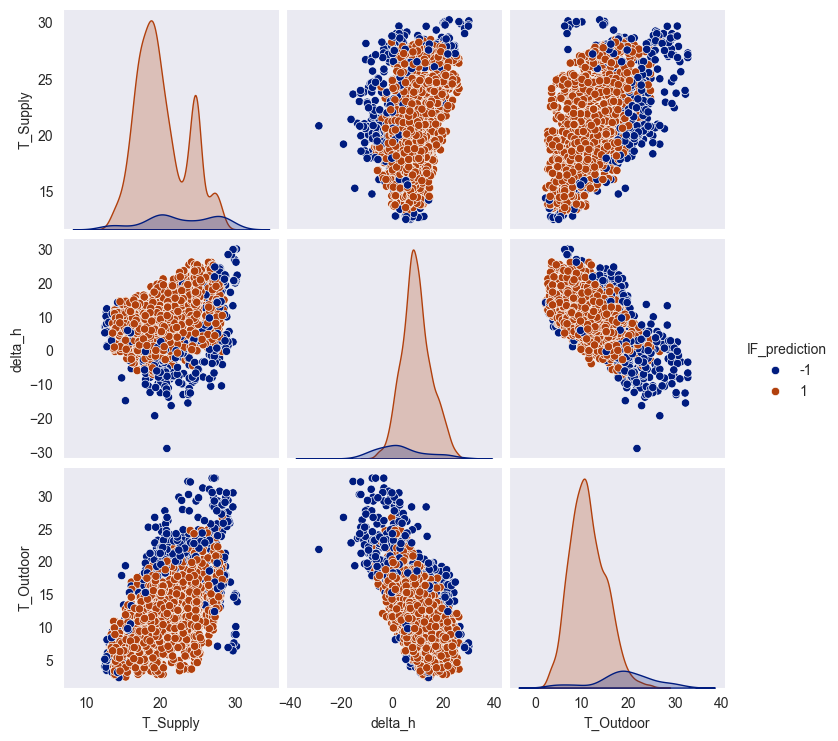

In [39]:
sns.set_style('dark')
g = sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', #'RH_Supply'
                              'IF_prediction']], 
                             hue= 'IF_prediction', 
                             palette='dark', 
                             corner=False
)
#plt.title('Pair plot separado por predicciones de IF', loc= 'center')
plt.show()

### Guardar modelo

In [40]:
from load_store_utils import guardar_modelo

guardar_modelo(IF, name='IF_trained.pickle', ruta_modelo='./models/anomaly_detection/')

El archivo IF_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

In [41]:
import joblib
IF_loaded = joblib.load('./models/anomaly_detection/IF_trained.pickle')

IF_loaded

IsolationForest(contamination=0.1)

## Local Outlier Factor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

### Train

In [42]:
from sklearn.neighbors import LocalOutlierFactor

In [43]:
LOF = LocalOutlierFactor(novelty= False, n_neighbors= 10, algorithm='auto', metric='minkowski', contamination=0.10)
LOF_train_labels = LOF.fit_predict(X_train_scl_df)

X_train_w_labels['LOF_prediction'] = LOF_train_labels
#X_train_w_labels.head()

In [44]:
print(X_train_w_labels['LOF_prediction'].value_counts())
X_train_w_labels[X_train_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    10292
-1     1144
Name: count, dtype: int64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-10-24 19:00:00  21.645000  22.104999       22.5     21.729999  22.200001   
2021-02-01 04:30:00  18.397500  18.414999       22.5     16.490000   9.100000   
2020-03-31 05:30:00  18.325000  18.687499       22.5     18.869999   8.400000   
2020-03-13 10:30:00  27.212499  22.515000       22.5     22.159999  16.900000   
2020-03-02 20:30:00  19.957499  19.830000       22.5     18.610000   8.900000   
2019-10-19 00:00:00  19.962499  20.102500       22.5     19.299999  18.299999   
2019-10-19 01:30:00  19.959999  20.115000       22.5     19.299999  18.299999   
2020-02-11 02:00:00  18.349999  18.555000       22.5     18.139999  18.000000   
2021-01-22 21:00:00  19.857500  20.845000       22.5     17.989999   4.900000   
2021-03-01 11:30:00  16.942500  21.147500       19.5     15.189999  17.400000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-10-24 19:00:00  59.029999  51.029999       74.75     0.0  0.000   
2021-02-01 04:30:00  49.144998  38.240000       93.00    12.5  5.070   
2020-03-31 05:30:00  52.600001  44.689999       91.50     0.0  0.000   
2020-03-13 10:30:00  42.625000  41.459999       78.25     6.5  2.586   
2020-03-02 20:30:00  45.465001  36.934998       94.75     0.0  0.000   
2019-10-19 00:00:00  71.465000  65.329998       88.00     0.0  0.000   
2019-10-19 01:30:00  74.505001  65.329998       97.00     0.0  0.000   
2020-02-11 02:00:00  40.619999  31.174999       39.00     0.0  0.000   
2021-01-22 21:00:00  43.054998  33.629999       98.25    13.0  5.058   
2021-03-01 11:30:00  44.189999  29.950000       54.00    13.5  5.124   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2020-10-24 19:00:00  -8.059604 -8.185099  7.114645     10   24    19   
2021-02-01 04:30:00   8.820967  0.839311  1.365204      2    1     4   
2020-03-31 05:30:00  11.559450  1.051930  1.061344      3   31     5   
2020-03-13 10:30:00  10.882855  2.266901  4.820590      3   13    10   
2020-03-02 20:30:00  10.832284  1.018405  1.268828      3    2    20   
2019-10-19 00:00:00  -1.231003 -0.323677  5.407308     10   19     0   
2019-10-19 01:30:00  -3.125006 -0.812462  5.383671     10   19     1   
2020-02-11 02:00:00   1.161705  0.295199  5.327268      2   11     2   
2021-01-22 21:00:00  17.342453  1.274312 -0.551936      1   22    21   
2021-03-01 11:30:00  -3.919793 -1.005214  5.067648      3    1    11   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2020-10-24 19:00:00             -1              -1  
2021-02-01 04:30:00              1              -1  
2020-03-31 05:30:00              1              -1  
2020-03-13 10:30:00              1              -1  
2020-03-02 20:30:00              1              -1  
2019-10-19 00:00:00              1              -1  
2019-10-19 01:30:00              1              -1  
2020-02-11 02:00:00              1              -1  
2021-01-22 21:00:00              1              -1  
2021-03-01 11:30:00             -1              -1

### validación

In [45]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [46]:
LOF = LocalOutlierFactor(novelty= True, n_neighbors= 10, algorithm='auto', metric='minkowski', contamination= 0.10)
LOF.fit(X_train_scl_df)
LOF_val_labels = LOF.predict(X_val_scl_df)

X_val_w_labels['LOF_prediction'] = LOF_val_labels
X_val_w_labels.head()

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2019-12-30 10:30:00  14.776503  1.433140  1.465860     12   30    10   
2021-02-27 01:30:00   7.816635  1.093036  3.379147      2   27     1   
2021-01-09 08:00:00  17.933847  1.289275 -0.714274      1    9     8   
2020-01-01 18:30:00  17.484945  1.861024  2.020213      1    1    18   
2021-03-07 20:00:00   6.538372  0.799461  2.757249      3    7    20   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2019-12-30 10:30:00              1               1  
2021-02-27 01:30:00              1               1  
2021-01-09 08:00:00              1               1  
2020-01-01 18:30:00              1               1  
2021-03-07 20:00:00              1               1

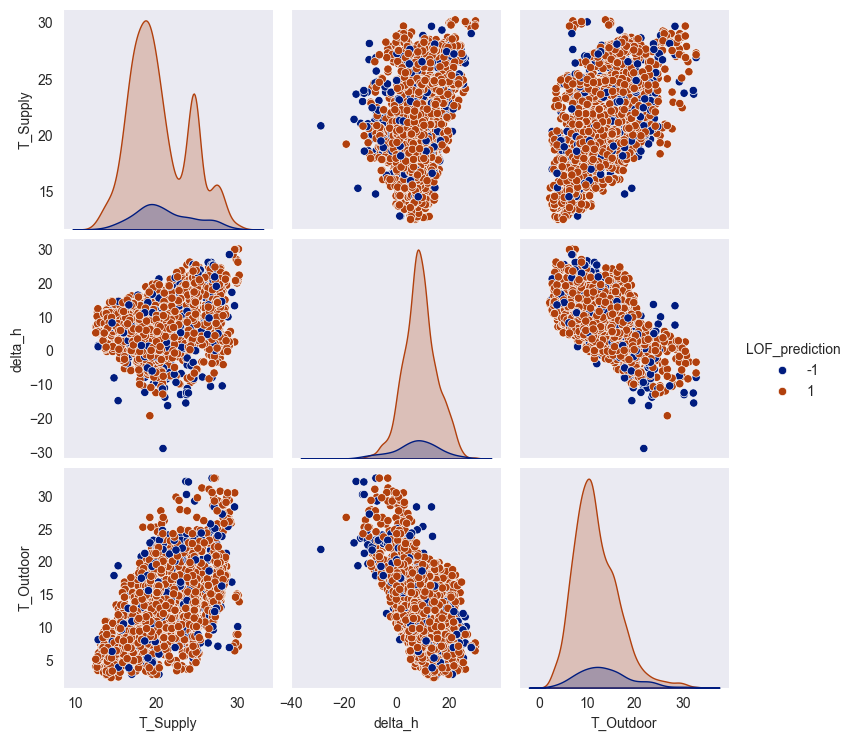

In [47]:
sns.set_style('dark')
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', #'RH_Supply'
                             'LOF_prediction']], 
                             hue= 'LOF_prediction', 
                             palette='dark')
plt.show()

In [48]:
print(X_val_w_labels['LOF_prediction'].value_counts(normalize= True))
X_val_w_labels[X_val_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    0.884081
-1    0.115919
Name: proportion, dtype: float64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-03-08 15:30:00  19.012500  22.230000       21.5     17.579999  20.799999   
2019-12-02 20:00:00  22.957500  21.112499       22.5     18.240000   9.600000   
2020-10-24 19:30:00  21.642499  22.030000       22.5     21.670000  21.200001   
2021-02-23 23:30:00  21.167499  20.857499       22.5     19.200000  12.800000   
2020-04-05 15:00:00  19.240000  19.239999       22.5     19.180000  22.900000   
2020-03-20 00:00:00  21.040000  21.125000       22.5     21.839999  15.200000   
2020-12-04 07:00:00  22.110000  19.242500       22.5     18.879999   4.600000   
2020-03-10 05:30:00  17.854999  17.797500       22.5     17.830000   9.900000   
2020-02-11 03:30:00  18.140000  18.427500       22.5     18.070000  17.000000   
2019-10-19 13:00:00  19.895000  19.989999       22.5     19.660000  18.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-03-08 15:30:00  43.944998  31.049999       51.75    13.0  5.154   
2019-12-02 20:00:00  45.509998  39.310000       82.50     6.0  2.466   
2020-10-24 19:30:00  58.969997  50.989998       80.75     0.0  0.000   
2021-02-23 23:30:00  45.079998  37.000000       69.75    12.5  4.944   
2020-04-05 15:00:00  42.864998  34.394998       34.50     0.0  0.000   
2020-03-20 00:00:00  42.115000  31.729999       56.25     0.0  0.000   
2020-12-04 07:00:00  38.449999  33.939999      100.00    12.5  5.004   
2020-03-10 05:30:00  45.164999  36.864999       56.00     0.0  0.000   
2020-02-11 03:30:00  42.474998  32.770000       41.00     0.0  0.000   
2019-10-19 13:00:00  70.579998  63.539999       89.50     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2021-03-08 15:30:00  -6.585842 -3.644996  6.520392      3    8    15   
2019-12-02 20:00:00  17.962539  1.788665  1.628799     12    2    20   
2020-10-24 19:30:00  -7.598259 -4.451733  6.677141     10   24    19   
2021-02-23 23:30:00  10.020806  1.306193  3.064021      2   23    23   
2020-04-05 15:00:00  -3.799540 -7.365288  7.398347      4    5    15   
2020-03-20 00:00:00   7.105200  1.199546  4.123076      3   20     0   
2020-12-04 07:00:00  20.367838  1.466108 -0.700866     12    4     7   
2020-03-10 05:30:00  11.750429  1.211946  1.838402      3   10     5   
2020-02-11 03:30:00   2.546177  0.549126  4.902325      2   11     3   
2019-10-19 13:00:00  -2.234786 -0.586479  5.403705     10   19    13   

                     IF_prediction  LOF_prediction  
Timestamp                                           
2021-03-08 15:30:00             -1              -1  
2019-12-02 20:00:00              1              -1  
2020-10-24 19:30:00             -1              -1  
2021-02-23 23:30:00              1              -1  
2020-04-05 15:00:00             -1              -1  
2020-03-20 00:00:00              1              -1  
2020-12-04 07:00:00              1              -1  
2020-03-10 05:30:00              1              -1  
2020-02-11 03:30:00              1              -1  
2019-10-19 13:00:00              1              -1

### Guardar modelo

In [49]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
guardar_modelo(LOF, name= 'LOF_trained.pickle', ruta_modelo= path)

El archivo LOF_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

## Elliptic Envelope

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

### Train

In [50]:
from sklearn.covariance import EllipticEnvelope

In [51]:
EE = EllipticEnvelope(contamination=0.1, random_state=42, support_fraction=1)
EE_train_labels = EE.fit_predict(X_train_scl_df)

X_train_w_labels['EE_prediction'] = EE_train_labels
print(X_train_w_labels['EE_prediction'].value_counts(normalize= True))

EE_prediction
 1    10292
-1     1144
Name: count, dtype: int64


In [52]:
X_train_w_labels[X_train_w_labels['EE_prediction']==-1].sample(5)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-04-06 14:00:00  27.970000  22.160000       22.5     21.629999  26.250000   
2019-10-18 08:30:00  15.770000  21.339999       18.5     13.419999  17.299999   
2021-03-06 08:30:00  20.149999  21.097500       19.5     17.580000   9.100000   
2020-03-21 17:30:00  21.542499  22.167499       22.5     22.700000  24.600000   
2021-03-08 02:00:00  18.167500  18.550000       20.5     18.369999   8.600000   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-04-06 14:00:00  32.470000  28.989999       32.50    13.0  5.166   
2019-10-18 08:30:00  81.004997  56.559997       95.50    13.0  5.244   
2021-03-06 08:30:00  52.049997  38.824999       93.00    12.5  5.136   
2020-03-21 17:30:00  42.179998  31.674999       42.75     0.0  0.000   
2021-03-08 02:00:00  47.154999  37.799999       82.50     0.0  0.000   

                       delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                              
2020-04-06 14:00:00   3.543312 -2.810596  8.808151      4    6    14   
2019-10-18 08:30:00  -8.412361 -1.846778  4.951956     10   18     8   
2021-03-06 08:30:00  13.542285  1.292651  1.365447      3    6     8   
2020-03-21 17:30:00  -6.806296  9.861030  8.128857      3   21    17   
2021-03-08 02:00:00  10.588587  0.980560  1.187902      3    8     2   

                     IF_prediction  LOF_prediction  EE_prediction  
Timestamp                                                          
2020-04-06 14:00:00             -1               1             -1  
2019-10-18 08:30:00             -1              -1             -1  
2021-03-06 08:30:00              1               1             -1  
2020-03-21 17:30:00             -1               1             -1  
2021-03-08 02:00:00              1               1             -1

### Validación

In [53]:
EE_val_labels = EE.predict(X_val_scl_df)

X_val_w_labels['EE_prediction'] = EE_val_labels
print(X_val_w_labels['EE_prediction'].value_counts(normalize= True))
X_val_w_labels[X_val_w_labels['EE_prediction']==-1].sample(5)

EE_prediction
 1    0.891424
-1    0.108576
Name: proportion, dtype: float64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-03-03 18:00:00  19.782500  23.035000       19.5     17.710000  16.799999   
2021-03-07 05:00:00  18.944999  19.244999       20.5     18.789999   9.800000   
2021-03-01 10:30:00  15.062500  20.620000       19.5     13.450000  13.400000   
2021-03-04 07:30:00  18.747499  20.629999       19.5     17.720000  10.300000   
2021-03-03 14:00:00  19.782500  22.702500       19.5     17.580000  18.799999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2021-03-03 18:00:00  39.804998  26.115000       57.00    12.5  5.226   
2021-03-07 05:00:00  45.984999  36.730000       87.00     0.0  0.000   
2021-03-01 10:30:00  47.855000  30.559999       57.75    12.5  5.082   
2021-03-04 07:30:00  44.654999  31.739999       75.00    13.0  5.058   
2021-03-03 14:00:00  41.254999  27.439999       45.75    12.5  5.178   

                      delta_h       KPI  T_wb_out  month  day  hour  \
Timestamp                                                             
2021-03-03 18:00:00  0.323966  0.046091  4.808395      3    3    18   
2021-03-07 05:00:00  8.476831  0.851310  1.699448      3    7     5   
2021-03-01 10:30:00  0.610223  0.084697  3.347291      3    1    10   
2021-03-04 07:30:00  8.922620  0.939993  1.961529      3    4     7   
2021-03-03 14:00:00  0.322183  0.053212  5.667856      3    3    14   

                     IF_prediction  LOF_prediction  EE_prediction  
Timestamp                                                          
2021-03-03 18:00:00             -1               1             -1  
2021-03-07 05:00:00              1               1             -1  
2021-03-01 10:30:00             -1               1             -1  
2021-03-04 07:30:00              1               1             -1  
2021-03-03 14:00:00              1               1             -1

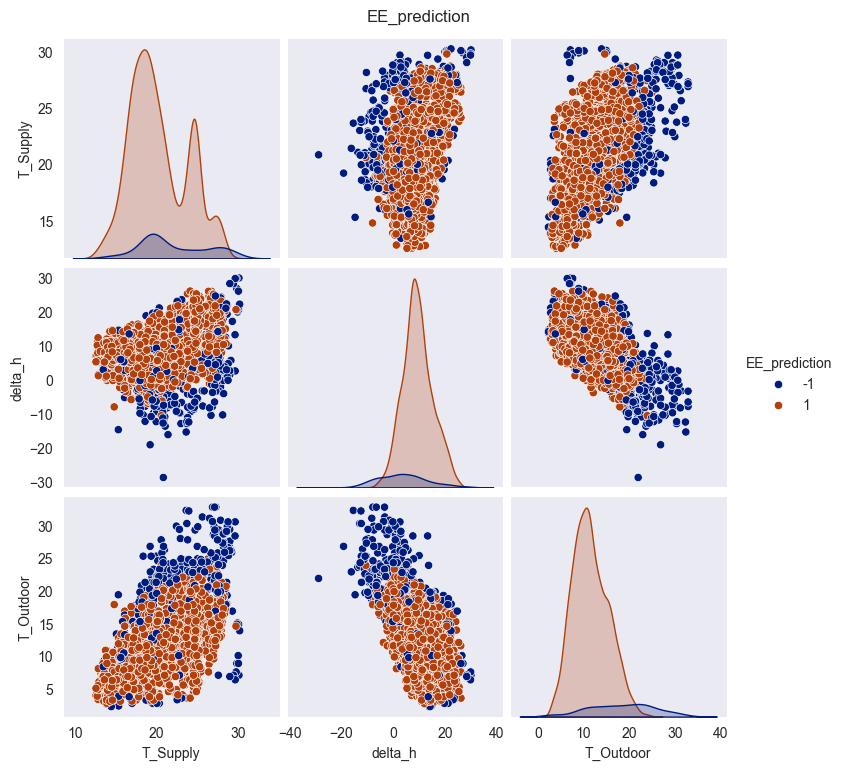

In [54]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', # 'RH_Supply',
                              'EE_prediction']], 
                             hue= 'EE_prediction', 
                             palette='dark')
plt.suptitle("EE_prediction", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardar modelo

In [55]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'EE_trained.pickle'

guardar_modelo(EE, name= name, ruta_modelo= path)

El archivo EE_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

## OneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

El One-Class SVM intenta encontrar un límite en el espacio de características que mejor separa los datos de entrenamiento (considerados como "normales") del origen (o de otros puntos considerados como "anómalos"). El objetivo es encapsular la mayoría de los datos de entrenamiento dentro de este límite, excluyendo las anomalías.

### Train y validación

In [56]:
from sklearn.svm import OneClassSVM

In [57]:
for nu in np.linspace(start= 0.01, stop= 0.1, num= 10):
    
    OCSVM = OneClassSVM(kernel= 'rbf', nu= nu, gamma= 'scale')
    OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
    OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)
    print(f'for nu: {round(nu, 2)} the number of outliers: ')
    print(np.unique(OCSVM_train_predictions, return_counts=True))
    print(np.unique(OCSVM_val_predictions, return_counts=True), '\n')

for nu: 0.01 the number of outliers: 
(array([-1,  1], dtype=int64), array([  125, 11311], dtype=int64))
(array([-1,  1], dtype=int64), array([  48, 3765], dtype=int64)) 

for nu: 0.02 the number of outliers: 
(array([-1,  1], dtype=int64), array([  228, 11208], dtype=int64))
(array([-1,  1], dtype=int64), array([  92, 3721], dtype=int64)) 

for nu: 0.03 the number of outliers: 
(array([-1,  1], dtype=int64), array([  344, 11092], dtype=int64))
(array([-1,  1], dtype=int64), array([ 132, 3681], dtype=int64)) 

for nu: 0.04 the number of outliers: 
(array([-1,  1], dtype=int64), array([  463, 10973], dtype=int64))
(array([-1,  1], dtype=int64), array([ 178, 3635], dtype=int64)) 

for nu: 0.05 the number of outliers: 
(array([-1,  1], dtype=int64), array([  574, 10862], dtype=int64))
(array([-1,  1], dtype=int64), array([ 216, 3597], dtype=int64)) 

for nu: 0.06 the number of outliers: 
(array([-1,  1], dtype=int64), array([  684, 10752], dtype=int64))
(array([-1,  1], dtype=int64), arra

In [58]:
OCSVM = OneClassSVM(kernel= 'rbf', nu= 0.09, gamma= 'scale')
OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)

X_train_w_labels['OCSVM_prediction'] = OCSVM_train_predictions
X_val_w_labels['OCSVM_prediction'] = OCSVM_val_predictions

X_train_w_labels[X_train_w_labels['OCSVM_prediction']==-1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-04-14 18:00:00  27.950000  24.664999       23.5     25.649999  30.799999   
2021-02-28 07:00:00  19.539999  19.934999       19.5     19.699999  11.600000   
2020-11-26 13:30:00  30.009999  18.245000       22.5     17.699999  15.100000   
2019-10-15 06:00:00  19.555000  20.067499       18.5     19.410000  18.299999   
2021-03-02 01:30:00  19.090000  19.499999       19.5     19.149999  11.300000   
2021-03-01 12:00:00  17.382500  21.139999       19.5     15.239999  19.349999   
2019-10-17 01:00:00  18.794999  19.599999       18.5     19.110000  16.299999   
2020-04-07 17:30:00  29.102499  23.610000       23.5     23.839999  30.500000   
2021-03-02 07:30:00  13.054999  19.289999       19.5     12.312000   8.800000   
2019-10-26 16:30:00  20.762500  20.807500       22.5     20.229999  27.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  \
Timestamp                                                              
2020-04-14 18:00:00  34.645000  28.309999       26.50    12.5  5.112   
2021-02-28 07:00:00  46.990000  37.659998       57.00     0.0  0.000   
2020-11-26 13:30:00  29.515000  36.029999       51.00     0.5  0.264   
2019-10-15 06:00:00  74.869999  62.664999       98.50     0.0  0.000   
2021-03-02 01:30:00  41.019998  31.164999       59.00     0.0  0.000   
2021-03-01 12:00:00  43.725001  29.834999       51.75    12.5  5.136   
2019-10-17 01:00:00  68.154999  54.804998       82.00     0.0  0.000   
2020-04-07 17:30:00  24.845000  20.724999       17.50    13.0  5.178   
2021-03-02 07:30:00  49.129999  30.499999       61.25    12.5  5.022   
2019-10-26 16:30:00  69.180000  59.779999       47.00     0.0  0.000   

                       delta_h       KPI   T_wb_out  month  day  hour  \
Timestamp                                                               
2020-04-14 18:00:00  -0.848759  0.171600  10.705890      4   14    18   
2021-02-28 07:00:00  12.502566  1.473723   2.572403      2   28     7   
2020-11-26 13:30:00  20.915242  3.494819   4.086005     11   26    13   
2019-10-15 06:00:00  -4.586596 -1.191364   5.379491     10   15     6   
2021-03-02 01:30:00   9.656455  1.109355   2.438556      3    2     1   
2021-03-01 12:00:00  -6.572103 -2.204206   5.901823      3    1    12   
2019-10-17 01:00:00   1.868045  0.358278   4.552825     10   17     1   
2020-04-07 17:30:00   2.273123 -0.504458  10.549088      4    7    17   
2021-03-02 07:30:00   4.966809  0.469567   1.345803      3    2     7   
2019-10-26 16:30:00  -6.746021  2.602351   9.280800     10   26    16   

                     IF_prediction  LOF_prediction  EE_prediction  \
Timestamp                                                           
2020-04-14 18:00:00             -1               1             -1   
2021-02-28 07:00:00              1               1             -1   
2020-11-26 13:30:00             -1               1             -1   
2019-10-15 06:00:00             -1               1             -1   
2021-03-02 01:30:00              1               1             -1   
2021-03-01 12:00:00             -1              -1             -1   
2019-10-17 01:00:00             -1               1             -1   
2020-04-07 17:30:00             -1               1             -1   
2021-03-02 07:30:00             -1               1             -1   
2019-10-26 16:30:00             -1               1             -1   

                     OCSVM_prediction  
Timestamp                              
2020-04-14 18:00:00                -1  
2021-02-28 07:00:00                -1  
2020-11-26 13:30:00                -1  
2019-10-15 06:00:00                -1  
2021-03-02 01:30:00                -1  
2021-03-01 12:00:00                -1  
2019-10-17 01:00:00                -1  
2020-04-07 17:30:00                -1  
2021-03-02 07:30:00                -1  
2019-10-26 16:30:00                -1

In [59]:
print(X_val_w_labels['OCSVM_prediction'].value_counts(normalize= True))

OCSVM_prediction
 1    0.899816
-1    0.100184
Name: proportion, dtype: float64


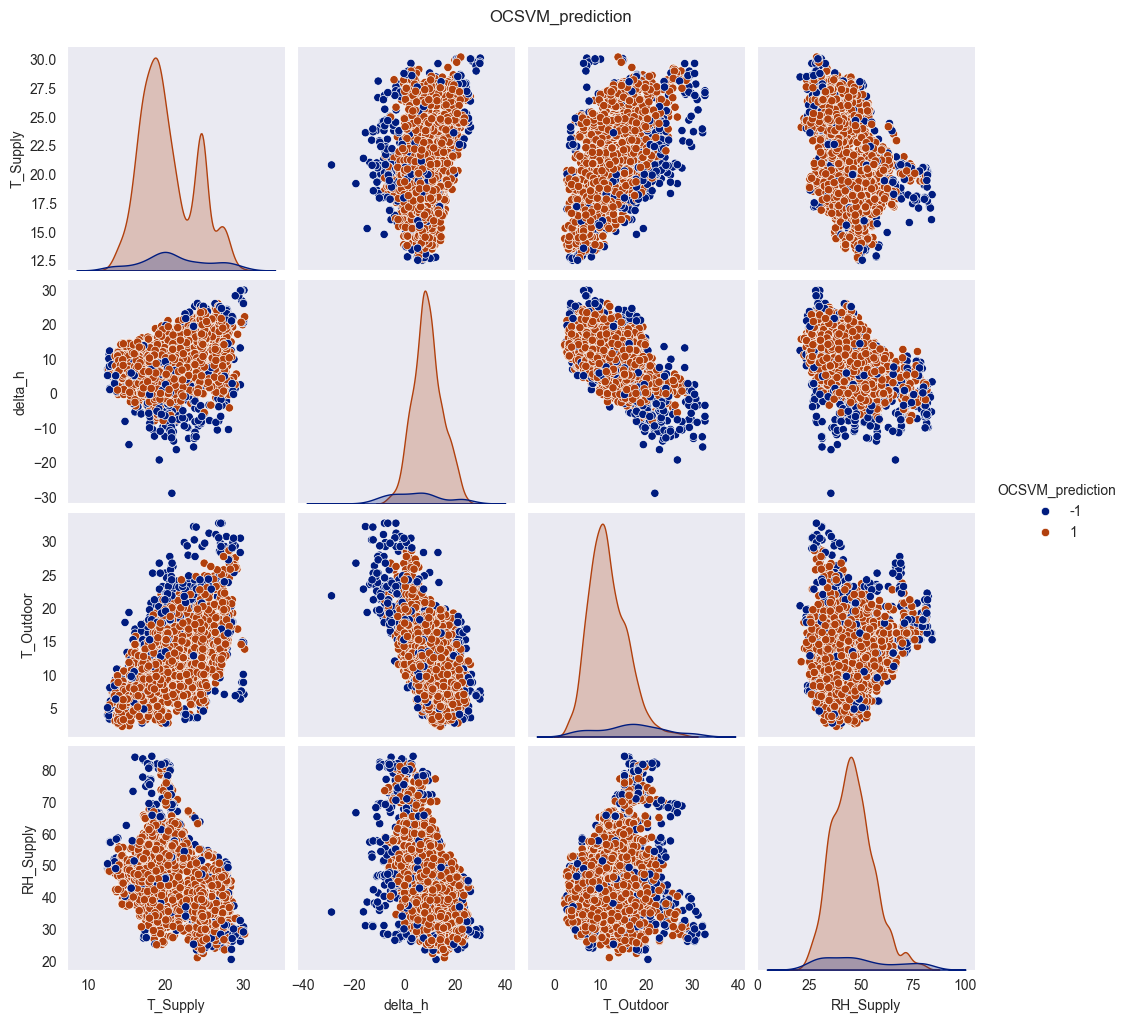

In [60]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'RH_Supply', 'OCSVM_prediction']], 
                             hue= 'OCSVM_prediction', 
                             palette='dark')
plt.suptitle("OCSVM_prediction", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardar modelo

In [61]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'OCSVM_trained.pickle'

guardar_modelo(OCSVM, name= name, ruta_modelo= path)

El archivo OCSVM_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

## Gaussian mixtures

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

### Choosing the number of clusters

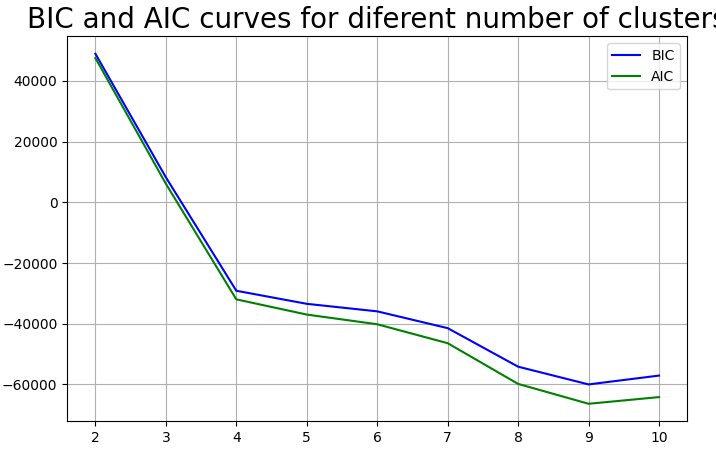

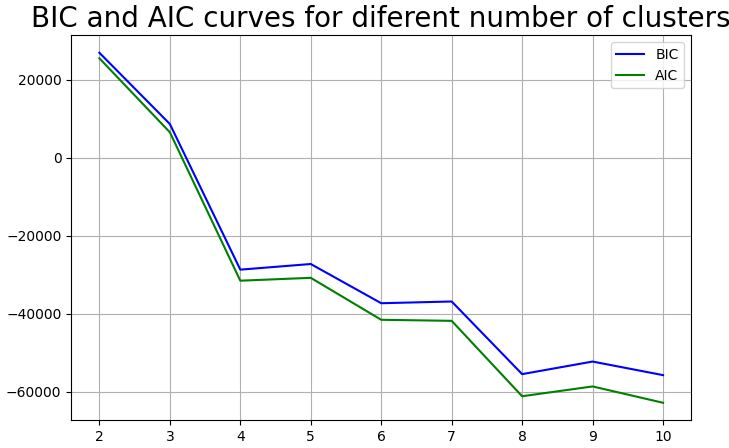

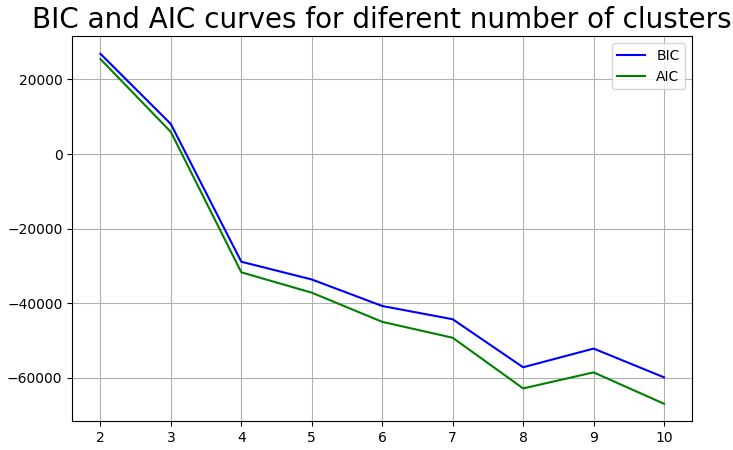

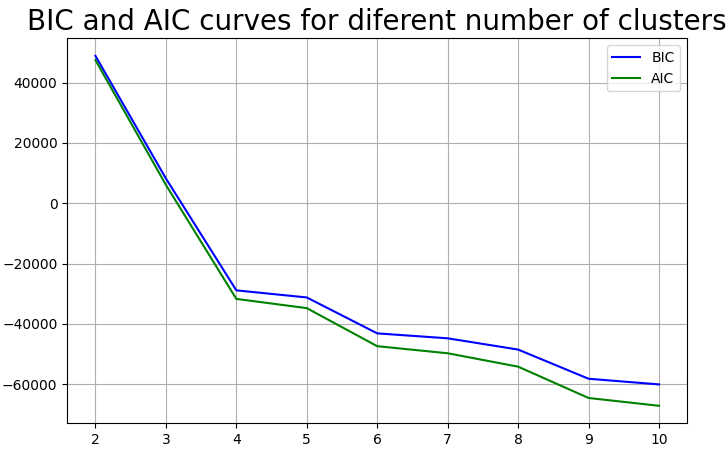

In [62]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [63]:
# for rs in range(10):
#     x = range(2, 11)
#     BIC = []
#     AIC = []
#     for cluster in x: 
#         GMM = GaussianMixture(n_components=cluster, n_init= 10, init_params= 'k-means++', random_state=rs)
#         GMM.fit(X_train_scl)
#         BIC.append(GMM.bic(X_train_scl))
#         AIC.append(GMM.aic(X_train_scl))
    
#     plt.figure(figsize= (8, 5))
#     plt.title('BIC and AIC curves for diferent number of clusters', fontsize= 20)
#     plt.plot(x, BIC, label= 'BIC', color= 'blue')
#     plt.plot(x, AIC, label= 'AIC', color= 'green')
#     plt.legend()
#     plt.grid()
#     plt.show()

In [64]:
# for rs in [0, 5, 17, 42]:
#     x = np.arange(3, 11)
#     print(rs)
#     for cluster in x: 
#         BGMM = BayesianGaussianMixture(n_components=cluster, n_init=10, init_params='k-means++', random_state= rs)
#         BGMM.fit(X_train_scl)
#         print(BGMM.weights_.round(2))
#     print('\n')

# Train

In [65]:
GM = GaussianMixture(n_components=4, random_state=0, n_init= 10, init_params='k-means++')
GM.fit(X_train_scl_df)
train_probas = GM.predict_proba(X_train_scl_df).round(4)

print(train_probas)

[[0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 9.993e-01 7.000e-04 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 7.000e-04 9.993e-01 0.000e+00]]


In [66]:
count = 0
gm_train_labels = []
for n in (train_probas):
    if max(n) <= 0.99: 
        gm_train_labels.append(-1)
        print(n)
        count+= 1
    else: gm_train_labels.append(1)

print(count)

[0.     0.     0.1676 0.8324]
[0.     0.0148 0.9852 0.    ]
[0.1813 0.8187 0.     0.    ]
[0.     0.0339 0.9661 0.    ]
[0.     0.9435 0.0565 0.    ]
[0.     0.6776 0.3224 0.    ]
[0.7534 0.2466 0.     0.    ]
[0.     0.5101 0.4899 0.    ]
[0.11 0.89 0.   0.  ]
[0.0161 0.9839 0.     0.    ]
[0.     0.0217 0.9783 0.    ]
[0.     0.0134 0.9866 0.    ]
[0.7322 0.2678 0.     0.    ]
[0.     0.9822 0.0178 0.    ]
[0.     0.9798 0.0202 0.    ]
[0.     0.0318 0.9682 0.    ]
[0.     0.3853 0.6147 0.    ]
[0.9878 0.     0.0122 0.    ]
[0.     0.9802 0.0198 0.    ]
[0.     0.6214 0.3786 0.    ]
[0.0182 0.9818 0.     0.    ]
[0.     0.9324 0.0676 0.    ]
[0.     0.9781 0.0219 0.    ]
[0.0125 0.9875 0.     0.    ]
[0.     0.     0.1378 0.8622]
[0.1469 0.8531 0.     0.    ]
[0.9842 0.0158 0.     0.    ]
[0.116 0.884 0.    0.   ]
[0.0305 0.9695 0.     0.    ]
[0.0327 0.9673 0.     0.    ]
[0.9765 0.0235 0.     0.    ]
[0.451 0.549 0.    0.   ]
[0.0166 0.9834 0.     0.    ]
[0.9747 0.005  0.0203 0.  

In [67]:
gm_train_labels = np.array(gm_train_labels)

X_train_w_labels['GM4_predictions'] = gm_train_labels

X_train_w_labels[X_train_w_labels['GM4_predictions']==-1].sample(10)

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2020-11-10 16:30:00  24.530000  23.839999       23.5     22.509999  21.100000   
2020-03-10 20:00:00  26.167499  22.182499       22.5     22.259999  14.900000   
2019-11-04 12:30:00  21.149999  20.802500       22.5     20.040000  18.299999   
2020-11-09 14:00:00  24.729999  23.827500       23.5     22.570000  22.100000   
2020-11-12 08:30:00  26.884999  22.794999       22.5     20.009999  15.000000   
2020-11-13 11:00:00  27.017499  23.239999       22.5     20.670000  14.550000   
2020-10-28 10:30:00  27.759999  23.187499       22.5     20.939999  15.800000   
2020-11-09 09:30:00  26.752499  22.854999       22.5     20.149999  13.100000   
2021-03-03 10:00:00  15.417500  20.974999       19.5     13.259999  12.800000   
2019-10-17 22:00:00  19.654999  20.419999       18.5     18.579999  19.299999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2020-11-10 16:30:00  49.980000  42.164999   66.000000    13.0  4.944  ...   
2020-03-10 20:00:00  29.030000  22.270000   39.000000     4.0  1.320  ...   
2019-11-04 12:30:00  57.254999  50.419998   80.750000     6.0  2.508  ...   
2020-11-09 14:00:00  47.099998  40.709999   56.550676    13.0  5.202  ...   
2020-11-12 08:30:00  46.409999  45.129999  100.000000    12.0  4.734  ...   
2020-11-13 11:00:00  44.839998  42.869999   79.750000    12.5  4.884  ...   
2020-10-28 10:30:00  38.044998  35.619999   68.250000    12.5  5.208  ...   
2020-11-09 09:30:00  43.125000  41.390000   59.834459    13.0  5.238  ...   
2021-03-03 10:00:00  43.429998  26.569999   62.000000    13.5  5.064  ...   
2019-10-17 22:00:00  68.619999  57.484999   86.500000     0.0  0.000  ...   

                          KPI  T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                                  
2020-11-10 16:30:00  0.960723  6.646731     11   10    16              1   
2020-03-10 20:00:00  2.683315  4.009583      3   10    20             -1   
2019-11-04 12:30:00 -0.330142  5.422378     11    4    12              1   
2020-11-09 14:00:00  1.985797  7.076122     11    9    14              1   
2020-11-12 08:30:00  1.764338  3.931251     11   12     8              1   
2020-11-13 11:00:00  2.633564  3.798039     11   13    11              1   
2020-10-28 10:30:00  2.734162  4.363854     10   28    10              1   
2020-11-09 09:30:00  3.147289  3.214426     11    9     9              1   
2021-03-03 10:00:00  0.021563  3.080764      3    3    10             -1   
2019-10-17 22:00:00 -1.764888  5.844707     10   17    22             -1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2020-11-10 16:30:00               1              1                 1   
2020-03-10 20:00:00               1              1                 1   
2019-11-04 12:30:00              -1              1                 1   
2020-11-09 14:00:00               1              1                 1   
2020-11-12 08:30:00               1              1                 1   
2020-11-13 11:00:00               1              1                 1   
2020-10-28 10:30:00              -1              1                 1   
2020-11-09 09:30:00              -1              1                 1   
2021-03-03 10:00:00               1             -1                -1   
2019-10-17 22:00:00               1             -1                -1   

                     GM4_predictions  
Timestamp                             
2020-11-10 16:30:00               -1  
2020-03-10 20:00:00               -1  
2019-11-04 12:30:00               -1  
2020-11-09 14:00:00               -1  
2020-11-12 08:30:00               -1  
2020-11-13 11:00:00               -1  
2020-10-28 10:30:00               

### validación

In [68]:
val_probas = GM.predict_proba(X_val_scl_df).round(4)

In [69]:
count = 0

gm_val_labels = []
for n in (val_probas):
    if max(n) <= 0.99: 
        gm_val_labels.append(-1)
        print(n)
        count+= 1
    else: gm_val_labels.append(1)

print(count)

[0.8166 0.1834 0.     0.    ]
[0.9499 0.0501 0.     0.    ]
[0.9006 0.0994 0.     0.    ]
[0.8762 0.0069 0.1169 0.    ]
[0.989 0.011 0.    0.   ]
[0.    0.    0.122 0.878]
[0.     0.7753 0.2247 0.    ]
[0.0826 0.284  0.6333 0.    ]
[0.     0.9024 0.0976 0.    ]
[0.     0.9104 0.0896 0.    ]
[0.    0.984 0.016 0.   ]
[0.547 0.    0.453 0.   ]
[0.    0.726 0.274 0.   ]
[0.     0.8362 0.1638 0.    ]
[0.9758 0.0242 0.     0.    ]
[0.     0.8804 0.1196 0.    ]
[0.     0.     0.0537 0.9463]
[0.     0.9509 0.0491 0.    ]
[0.     0.9875 0.0125 0.    ]
[0.8574 0.1426 0.     0.    ]
[0.9422 0.0209 0.0369 0.    ]
[0.     0.9799 0.0201 0.    ]
[0.971 0.029 0.    0.   ]
[0.     0.3098 0.6902 0.    ]
[0.3042 0.0161 0.6797 0.    ]
[0.     0.0186 0.9814 0.    ]
[0.1517 0.8483 0.     0.    ]
[0.2548 0.7452 0.     0.    ]
[0.0298 0.9702 0.     0.    ]
[0.1964 0.8036 0.     0.    ]
[0.0245 0.     0.9755 0.    ]
[0.9431 0.0569 0.     0.    ]
[0.     0.8214 0.1786 0.    ]
[0.     0.4899 0.5101 0.    ]
[0. 

In [70]:
gm_val_labels = np.array(gm_val_labels)

X_val_w_labels['GM4_predictions'] = gm_val_labels
print(X_val_w_labels['GM4_predictions'].value_counts(normalize= True))

X_val_w_labels[X_val_w_labels['GM4_predictions']==-1].sample(10)

GM4_predictions
 1    0.97797
-1    0.02203
Name: proportion, dtype: float64


T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2021-02-28 13:00:00  19.352499  19.837499       19.5     19.539999  16.600000   
2020-10-27 10:00:00  26.884999  22.754999       22.5     20.110000  14.800000   
2020-02-12 19:30:00  26.637500  23.330000       23.5     22.499999  13.600000   
2020-04-14 23:30:00  23.045000  23.364999       23.5     24.520000  17.799999   
2020-11-05 06:30:00  22.209999  22.365000       22.5     20.229999  14.300000   
2020-03-12 13:00:00  26.885000  22.540000       22.5     20.839999  20.400000   
2020-10-22 09:30:00  27.162499  22.410000       22.5     20.309999  16.299999   
2020-11-03 07:30:00  22.262500  22.219999       22.5     20.229999  15.300000   
2021-02-26 21:30:00  20.390000  20.930000       19.5     21.299999  15.500000   
2020-02-19 14:30:00  24.972499  22.700000       22.5     18.250000  19.799999   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2021-02-28 13:00:00  46.295000  36.895000        47.0     0.0  0.000  ...   
2020-10-27 10:00:00  42.910000  42.019998        76.0    13.5  5.208  ...   
2020-02-12 19:30:00  25.325000  16.300000        38.5     7.5  2.640  ...   
2020-04-14 23:30:00  38.959999  28.899999        67.0     0.0  0.000  ...   
2020-11-05 06:30:00  59.209998  52.334997        94.0    13.0  5.208  ...   
2020-03-12 13:00:00  43.189999  40.674999        72.0    13.0  5.094  ...   
2020-10-22 09:30:00  45.849998  45.914999        88.0    13.5  5.220  ...   
2020-11-03 07:30:00  58.449999  50.420000        98.5    13.0  5.208  ...   
2021-02-26 21:30:00  46.560000  35.834999        47.5     0.0  0.000  ...   
2020-02-19 14:30:00  36.634998  30.624999        42.5    12.5  5.172  ...   

                          KPI  T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                                  
2021-02-28 13:00:00  1.044700  4.730047      2   28    13              1   
2020-10-27 10:00:00  2.542587  3.916198     10   27    10              1   
2020-02-12 19:30:00  2.489825  3.456090      2   12    19             -1   
2020-04-14 23:30:00  0.164070  5.227396      4   14    23             -1   
2020-11-05 06:30:00  1.314873  3.646552     11    5     6              1   
2020-03-12 13:00:00  1.521201  6.341536      3   12    13              1   
2020-10-22 09:30:00  2.149131  4.537642     10   22     9              1   
2020-11-03 07:30:00  0.794631  4.068062     11    3     7              1   
2021-02-26 21:30:00  1.627396  4.259873      2   26    21             -1   
2020-02-19 14:30:00  2.984460  6.092259      2   19    14              1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2021-02-28 13:00:00               1             -1                 1   
2020-10-27 10:00:00               1              1                 1   
2020-02-12 19:30:00               1              1                 1   
2020-04-14 23:30:00              -1              1                -1   
2020-11-05 06:30:00               1              1                 1   
2020-03-12 13:00:00               1              1                 1   
2020-10-22 09:30:00               1              1                 1   
2020-11-03 07:30:00               1              1                 1   
2021-02-26 21:30:00               1             -1                -1   
2020-02-19 14:30:00               1              1                 1   

                     GM4_predictions  
Timestamp                             
2021-02-28 13:00:00               -1  
2020-10-27 10:00:00               -1  
2020-02-12 19:30:00               -1  
2020-04-14 23:30:00               -1  
2020-11-05 06:30:00               -1  
2020-03-12 13:00:00               -1  
2020-10-22 09:30:00               

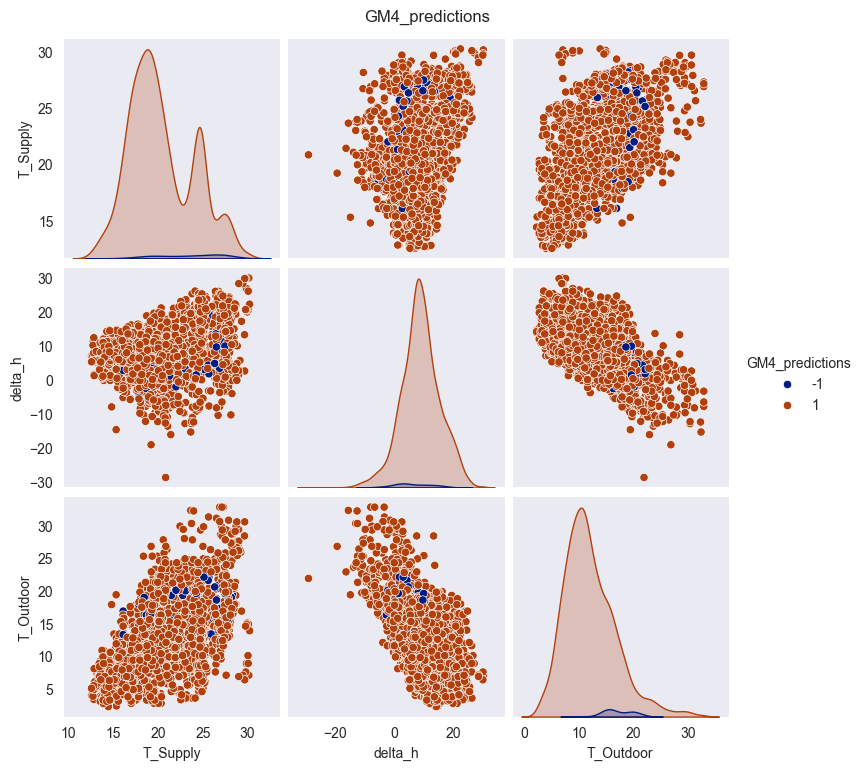

In [71]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', #'RH_Supply',
                              'GM4_predictions']], 
                             hue= 'GM4_predictions', 
                             palette='dark')
plt.suptitle("GM4_predictions", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()


### Guardar modelo

In [72]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'GM_trained.pickle'

guardar_modelo(GM, name= name, ruta_modelo= path)

El archivo GM_trained.pickle ya existe en el directorio ./models/anomaly_detection/.


False

## Probando dbscan - KNN

### TRAIN

In [73]:
from sklearn.cluster import DBSCAN

In [74]:
X_train_scl_df.head()

T_Supply  T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                     
2020-04-09 23:00:00  0.662214  1.426083   1.599365      2.583675   1.605107   
2020-11-20 20:00:00  1.448211  1.230479   0.859225      1.303768  -0.027849   
2020-01-20 19:30:00  1.220018  0.775488   0.119085     -0.454952  -0.621651   
2021-02-02 13:30:00 -0.117617  0.786119   0.119085     -0.183317   0.905269   
2020-01-27 19:00:00  1.235094  0.842461   0.119085     -0.395100  -0.133885   

                     RH_Supply  RH_Return  RH_Outdoor    Energy     Power  \
Timestamp                                                                   
2020-04-09 23:00:00  -1.168410  -1.431299   -1.664394 -0.960379 -0.959378   
2020-11-20 20:00:00  -1.072470  -0.916250   -1.290617  0.046256  0.064811   
2020-01-20 19:30:00  -1.646246  -1.499307   -0.991596  1.136778  1.099066   
2021-02-02 13:30:00  -0.001296  -0.281054    0.005142  1.220665  1.177076   
2020-01-27 19:00:00  -0.811662  -0.579837    0.254326  1.220665  1.192174   

                      delta_h       KPI  T_wb_out     month       day  \
Timestamp                                                               
2020-04-09 23:00:00 -0.995300 -0.030158  1.611591 -0.529507 -0.798599   
2020-11-20 20:00:00  1.857548  0.204311  0.014721  0.968411  0.452389   
2020-01-20 19:30:00  1.682046  0.116400 -0.578710 -1.171472  0.452389   
2021-02-02 13:30:00 -1.654423 -0.208433  0.912605 -0.957483 -1.594683   
2020-01-27 19:00:00  0.937143  0.086210 -0.126481 -1.171472  1.248472   

                         hour  
Timestamp                      
2020-04-09 23:00:00  1.668730  
2020-11-20 20:00:00  1.234558  
2020-01-20 19:30:00  1.089834  
2021-02-02 13:30:00  0.221490  
2020-01-27 19:00:00  1.089834

In [75]:
X_train_scl_df.shape

(11436, 16)

In [76]:
dbscan = DBSCAN(eps=1.75, min_samples=50, algorithm='auto', metric='euclidean')
dbscan.fit(X_train_scl_df)
dbscan_labels = dbscan.labels_

print(np.unique(dbscan_labels, return_counts=True))

(array([-1,  0,  1,  2,  3], dtype=int64), array([ 1105, 10104,   104,    70,    53], dtype=int64))


In [77]:
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 1.75,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 50,
 'n_jobs': None,
 'p': None}

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# X_dbscan = X_train_scl_df.copy()
# X_dbscan['dbscan_labels'] = dbscan_labels

knn_dbscan = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan.fit(X_train_scl_df, dbscan_labels)

dbscan_knn_train_labels = knn_dbscan.predict(X_train_scl_df)

In [80]:
print('Las etiquetas de dbscan: ')
print(np.unique(dbscan_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_labels, return_counts=True)[1][0])/(np.unique(dbscan_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))
print('\n')

print('las predicciones de knn para esas etiquetas')
print(np.unique(dbscan_knn_train_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_train_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_train_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

Las etiquetas de dbscan: 
(array([-1,  0,  1,  2,  3], dtype=int64), array([ 1105, 10104,   104,    70,    53], dtype=int64))
0.0966


las predicciones de knn para esas etiquetas
(array([-1,  0,  1,  2,  3], dtype=int64), array([ 1010, 10182,   116,    73,    55], dtype=int64))
0.0883


In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [82]:
accuracy_score(dbscan_labels, dbscan_knn_train_labels).round(4)

0.9863

In [83]:
confusion_matrix(dbscan_labels, dbscan_knn_train_labels)

array([[  980,   106,    12,     3,     4],
       [   26, 10076,     2,     0,     0],
       [    2,     0,   102,     0,     0],
       [    0,     0,     0,    70,     0],
       [    2,     0,     0,     0,    51]], dtype=int64)

In [84]:
from sklearn.metrics import f1_score

f1_score(dbscan_labels, dbscan_knn_train_labels, average= 'micro')

0.9862714235746765

### Validación

In [85]:
dbscan_knn_val_labels = knn_dbscan.predict(X_val_scl_df)
print('las predicciones en validación: ')
print(np.unique(dbscan_knn_val_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_val_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_val_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

las predicciones en validación: 
(array([-1,  0,  1,  2,  3], dtype=int64), array([ 373, 3362,   43,   19,   16], dtype=int64))
0.0978


### VALIDANDO DBSCAN KNN CON OTRO ENFOQUE

Aqui saco primero el ground truth con dscan para sacar metricas en validación. Luego el KNN esta solo entrenado en train

In [86]:
X_train_full.shape

(15249, 16)

In [87]:
X_train_full_scl = scaler.transform(X_train_full)

dbscan = DBSCAN(1.75, min_samples=50,algorithm='auto', metric='euclidean')
full_ground_truth = dbscan.fit_predict(X_train_full_scl)

In [88]:
np.unique(full_ground_truth, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([  929,    59, 13815,   107,    52,    56,    71,    87,    73],
       dtype=int64))

In [89]:
X_T, X_V, y_t, y_v = train_test_split(X_train_full_scl, full_ground_truth, shuffle= True, random_state=42)
knn_dbscan_0 = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan_0.fit(X_T, y_t)
train_labels = knn_dbscan_0.predict(X_T)
val_labels = knn_dbscan_0.predict(X_V)

In [90]:
train_acc = accuracy_score(y_t, train_labels)
val_acc = accuracy_score(y_v, val_labels)

print(f'train acc: {train_acc.round(4)}')
print(f'val acc: {val_acc.round(4)}')

train acc: 0.9878
val acc: 0.9824


In [91]:
print(f1_score(y_t, train_labels, average= 'micro'))
print(f1_score(y_v, val_labels, average= 'micro'))

0.9878454004896817
0.982428533962759


In [92]:
train_conf_m = confusion_matrix(y_t, train_labels)
train_conf_m

array([[  548,     0,    87,     9,     8,     1,    10,     3,     1],
       [    0,    44,     0,     0,     0,     0,     0,     0,     0],
       [   13,     0, 10379,     0,     0,     0,     0,     0,     0],
       [    1,     0,     0,    71,     0,     0,     0,     0,     0],
       [    0,     0,     1,     0,    38,     0,     0,     0,     0],
       [    3,     0,     0,     0,     0,    38,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,    54,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,    70,     0],
       [    2,     0,     0,     0,     0,     0,     0,     0,    55]],
      dtype=int64)

In [93]:
val_conf_matrix = confusion_matrix(y_v, val_labels)
val_conf_matrix

array([[ 208,    2,   44,    1,    4,    1,    0,    2,    0],
       [   0,   15,    0,    0,    0,    0,    0,    0,    0],
       [   6,    0, 3417,    0,    0,    0,    0,    0,    0],
       [   1,    0,    1,   33,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,   12,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,   11,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   17,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,   17,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   16]],
      dtype=int64)

In [94]:
X_val_w_labels['KNN_DBSCAN'] = val_labels
display(X_val_w_labels.head())

T_Supply   T_Return  SP_Return  T_Saturation  T_Outdoor  \
Timestamp                                                                       
2019-12-30 10:30:00  24.677500  20.217500       22.5     17.559999        9.4   
2021-02-27 01:30:00  19.972500  20.544999       19.5     20.399999       13.5   
2021-01-09 08:00:00  20.274999  18.247499       22.5     18.229999        4.3   
2020-01-01 18:30:00  24.769999  20.569999       22.5     17.750000       10.4   
2021-03-07 20:00:00  18.619999  18.837499       20.5     18.559999       12.1   

                     RH_Supply  RH_Return  RH_Outdoor  Energy  Power  ...  \
Timestamp                                                             ...   
2019-12-30 10:30:00  36.669998  32.814999       100.0    12.0  4.860  ...   
2021-02-27 01:30:00  45.980000  36.294998        64.0     0.0  0.000  ...   
2021-01-09 08:00:00  30.850000  24.214999        74.0    12.0  4.992  ...   
2020-01-01 18:30:00  34.430000  29.259999        70.0    12.5  4.902  ...   
2021-03-07 20:00:00  46.614998  37.504999        71.0     0.0  0.000  ...   

                     T_wb_out  month  day  hour  IF_prediction  \
Timestamp                                                        
2019-12-30 10:30:00  1.465860     12   30    10              1   
2021-02-27 01:30:00  3.379147      2   27     1              1   
2021-01-09 08:00:00 -0.714274      1    9     8              1   
2020-01-01 18:30:00  2.020213      1    1    18              1   
2021-03-07 20:00:00  2.757249      3    7    20              1   

                     LOF_prediction  EE_prediction  OCSVM_prediction  \
Timestamp                                                              
2019-12-30 10:30:00               1              1                 1   
2021-02-27 01:30:00               1             -1                -1   
2021-01-09 08:00:00               1              1                 1   
2020-01-01 18:30:00               1              1                 1   
2021-03-07 20:00:00               1             -1                 1   

                     GM4_predictions  KNN_DBSCAN  
Timestamp                                         
2019-12-30 10:30:00                1           1  
2021-02-27 01:30:00                1           5  
2021-01-09 08:00:00                1           1  
2020-01-01 18:30:00                1           1  
2021-03-07 20:00:00                1          -1  

[5 rows x 22 columns]

In [95]:
X_val_w_labels['KNN_DBSCAN'].value_counts(normalize= True)

KNN_DBSCAN
 1    0.908209
-1    0.057435
 2    0.008917
 6    0.004983
 5    0.004458
 0    0.004458
 3    0.004196
 7    0.004196
 4    0.003147
Name: proportion, dtype: float64

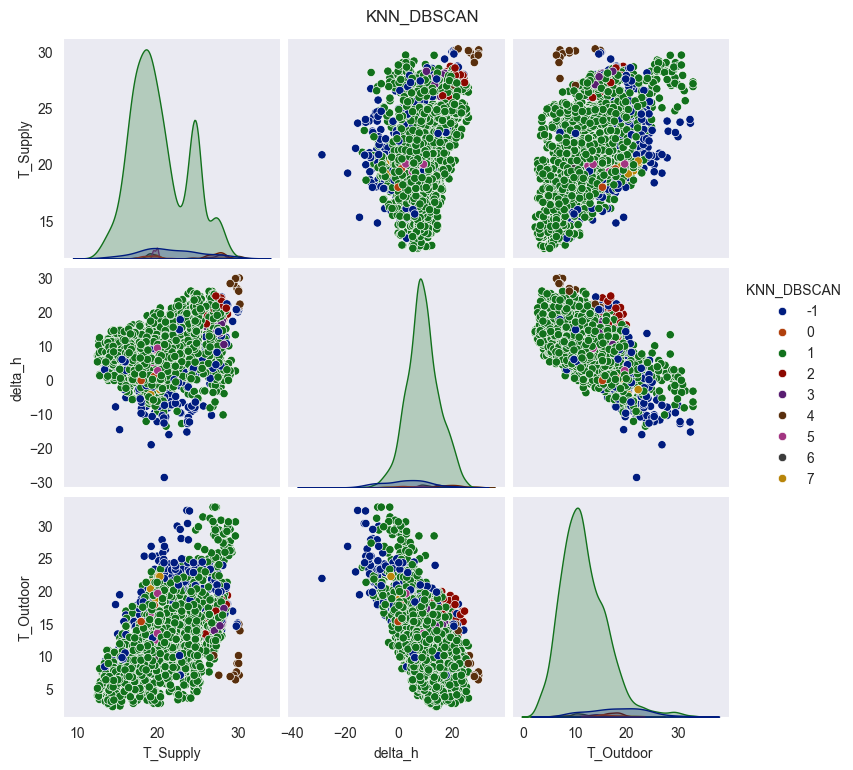

In [96]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                             'KNN_DBSCAN']], 
                             hue= 'KNN_DBSCAN', 
                             palette='dark')
plt.suptitle("KNN_DBSCAN", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

### Guardamos el modelo

In [97]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'dbscan_knn.pickle'

guardar_modelo(knn_dbscan, name= name, ruta_modelo= path)

El archivo dbscan_knn.pickle ya existe en el directorio ./models/anomaly_detection/.


False

## Fuzzy c-means

# MAYORITY VOTING

In [98]:

def mayority_voting(row): 
    count_outlier_predictions = (row == -1).sum()
    if count_outlier_predictions >= (len(row) / 2): return -1 # anomaly
    else:                                           return 1  # not an anomaly

In [99]:
# iso_for = X_val_w_labels['IF_prediction'] == -1
# ee_en =  X_val_w_labels['EE_prediction'] == -1
# lof = X_val_w_labels['LOF_prediction'] == -1
# ocsvm =  X_val_w_labels['OCSVM_prediction'] == -1
# gm = X_val_w_labels['GM4_prediction'] == -1
# knn_dbs =  X_val_w_labels['KNN_DBSCAN'] == -1

X_val_w_labels['anomaly'] = X_val_w_labels[['IF_prediction', 'LOF_prediction', 'EE_prediction',	
                                            'OCSVM_prediction',	'GM4_predictions', 'KNN_DBSCAN']].apply(lambda x: mayority_voting(x), axis= 1)

X_val_w_labels['anomaly'].value_counts(normalize= True)

anomaly
 1    0.927878
-1    0.072122
Name: proportion, dtype: float64

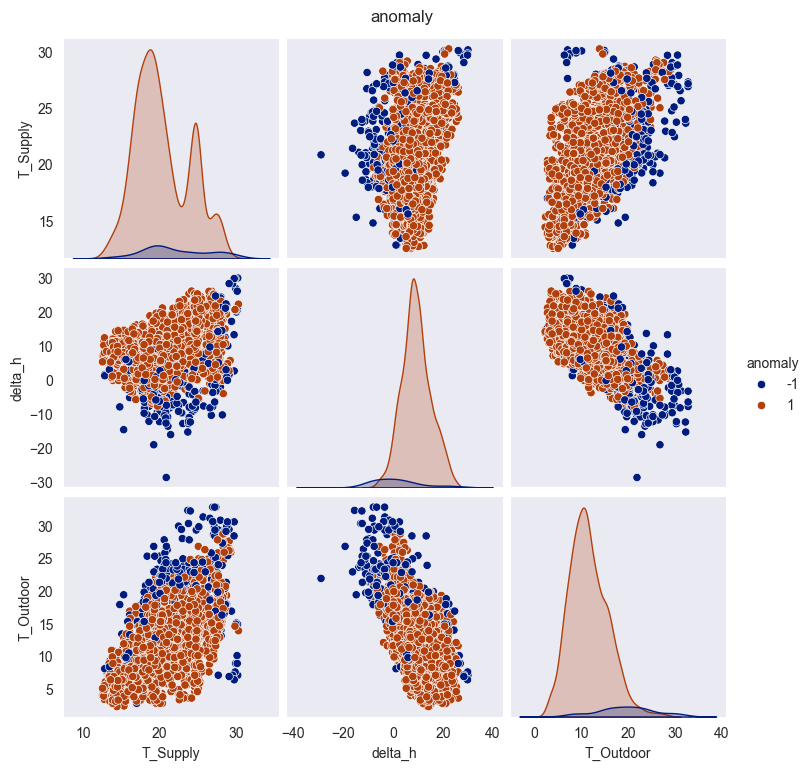

In [100]:
sns.pairplot(X_val_w_labels[['T_Supply', 'delta_h','T_Outdoor', 
                              'anomaly']], 
                             hue= 'anomaly', 
                             palette='dark')
plt.suptitle("anomaly", y=1.02)  #
# plt.title("EE prediction") 
#g.set_title('EE_outlier_prediction')
plt.show()

In [101]:
def _rate_anomaly_grade(row): 
    count_outlier_predictions = (row == -1).sum()
    if count_outlier_predictions <= (len(row)/3):      return 'lectura común'
    elif count_outlier_predictions <= (len(row)*0.5):  return 'lectura poco común'
    elif count_outlier_predictions <= (len(row)*0.75): return 'lectura atípica'
    else:                                              return 'anomalía'

X_val_w_labels['anomaly_grade'] = X_val_w_labels[['IF_prediction', 'LOF_prediction', 'EE_prediction',	
                                            'OCSVM_prediction',	'GM4_predictions', 'KNN_DBSCAN']].apply(lambda x: _rate_anomaly_grade(x), axis= 1)

X_val_w_labels['anomaly_grade'].value_counts(normalize= True)

anomaly_grade
lectura común         0.927878
lectura poco común    0.034094
lectura atípica       0.028586
anomalía              0.009441
Name: proportion, dtype: float64